# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
#1. Read data
data = pd.read_csv('train.csv')
data.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
data.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [5]:
df1 = data.copy()

# X·ª≠ l√Ω d·ªØ li·ªáu kh√¥ng nh·∫•t qu√°n

# Age

In [6]:
df1["Age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [7]:
# xo√° c√°c k√Ω t·ª± kh√¥ng h·ª£p l·ªá:
df1['Age'] = df1['Age'].str.replace(' ', '').str.replace('-', '').str.replace('_', '')

# ƒë·ªïi v·ªÅ ki·ªÉu int:
df1["Age"] = pd.to_numeric(df1["Age"], downcast="integer")

# Check ki·ªÉu d·ªØ li·ªáu:
df1["Age"].dtype

dtype('int16')

In [8]:
# df1["Age"].unique()

In [9]:
# df1['Age'].hist(bins=10)

# SSN

In [10]:
df1["SSN"].unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [11]:
df1.SSN.value_counts()

SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

In [12]:
# Thay ƒë·ªïi gi√° tr·ªã kh√¥ng h·ª£p l·ªá b·∫±ng NaN
df1['SSN'] = df1['SSN'].replace('#F%$D@*&8', np.nan)


In [13]:
df1['SSN'].isna().sum()

5572

# Occupation

In [14]:
df1.Occupation.value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [15]:
# Thay ƒë·ªïi gi√° tr·ªã kh√¥ng h·ª£p l·ªá b·∫±ng NaN
df1['Occupation'] = df1['Occupation'].replace('_______', np.nan)


In [16]:
df1['Occupation'].isna().sum()

7062

# Annual_Income

In [17]:
df1["Annual_Income"].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [18]:
df1.Annual_Income.value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: count, Length: 18940, dtype: int64

In [19]:
# xo√° k√Ω t·ª± "_" kh√¥ng h·ª£p l·ªá:
df1["Annual_Income"] = df1["Annual_Income"].str.strip("_")

# chuy·ªÉn str v·ªÅ int:
df1["Annual_Income"] = pd.to_numeric(df1["Annual_Income"], downcast="integer")
df1["Annual_Income"].dtype

dtype('float64')

# Payment_Behaviour

In [20]:
df1.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [21]:
# ƒëi·ªÅn gi√° tr·ªã ko h·ª£p l·ªá b·∫±ng nan
df1.loc[(df1["Payment_Behaviour"] == "!@9#%8"), "Payment_Behaviour"] = np.nan

# Monthly_Balance

In [22]:
df1["Monthly_Balance"].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [23]:
# ƒë·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa c√°c gi√° tr·ªã duy nh·∫•t c·ªßa c·ªôt Monthly_Balance:
df1.Monthly_Balance.value_counts(dropna=False)

Monthly_Balance
NaN                                 1200
__-333333333333333333333333333__       9
312.49408867943663                     1
347.413889978152                       1
254.9709216273975                      1
                                    ... 
366.2890379762706                      1
151.1882696261166                      1
306.75027851710234                     1
278.8720257394474                      1
393.673696                             1
Name: count, Length: 98793, dtype: int64

In [24]:
# ƒë·∫øm gi√° tr·ªã ko h·ª£p l·ªá:
df1[pd.to_numeric(
    df1["Monthly_Balance"],
    errors="coerce").isna()]["Monthly_Balance"].value_counts(dropna=False)

Monthly_Balance
NaN                                 1200
__-333333333333333333333333333__       9
Name: count, dtype: int64

In [25]:
# thay gi√° tr·ªã kh√¥ng h·ª£p l·ªá b·∫±ng null:
df1["Monthly_Balance"] = df1["Monthly_Balance"].replace('__-333333333333333333333333333__', np.nan)

In [26]:
# # lo·∫°i b·ªè k√Ω t·ª± kh√¥ng h·ª£p l·ªá:
# df1['Monthly_Balance'] = df1['Monthly_Balance'].apply(
#     lambda x: x.replace('_', '').replace('-', '') if isinstance(x, str) else x)

# chuy·ªÉn v·ªÅ ki·ªÉu float:
df1["Monthly_Balance"] = df1["Monthly_Balance"].astype('float')

# Check ki·ªÉu d·ªØ li·ªáu:
df1["Monthly_Balance"].dtype

dtype('float64')

In [27]:
# df1["Monthly_Balance"].hist(bins=10)

In [28]:
# df1["Monthly_Balance"].isna().sum()

# Credit_Mix

In [29]:
df1["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [30]:
df1.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [31]:
# chuy·ªÉn "_" b·∫±ng null
df1.loc[df1["Credit_Mix"] == "_", "Credit_Mix"] = pd.NA

In [32]:
df1["Credit_Mix"].isna().sum()

20195

# Outstanding_Debt

In [33]:
df1.Outstanding_Debt.value_counts().sample(10)


Outstanding_Debt
115.38     8
89.93      8
1434.97    8
2057.89    8
1408.73    8
1044.63    8
965.14     8
1716.82    7
839.85     8
1387.48    8
Name: count, dtype: int64

In [34]:
df1[pd.to_numeric(df1["Outstanding_Debt"], errors="coerce").isna()]["Outstanding_Debt"].head(20)

87      1328.93_
142     1283.37_
368     2797.17_
632     3818.57_
703      343.84_
731      363.51_
782      404.51_
819     1755.81_
835     2593.44_
992       89.62_
1147    1054.86_
1148    1054.86_
1162    1374.23_
1243    1166.47_
1339     457.81_
1369    1684.06_
1486    1126.35_
1542    2098.83_
1573     761.18_
1633    1343.01_
Name: Outstanding_Debt, dtype: object

In [35]:
df1["Outstanding_Debt"] = df1["Outstanding_Debt"].str.strip("_")

df1["Outstanding_Debt"] = pd.to_numeric(df1["Outstanding_Debt"], downcast="float")

df1["Outstanding_Debt"].dtype

dtype('float32')

# Num_of_Loan

In [36]:
df1["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [37]:
df1[pd.to_numeric(df1["Num_of_Loan"], errors="coerce").isna()]["Num_of_Loan"].head(20)


37     0_
80     3_
84     3_
94     2_
119    5_
125    2_
131    0_
144    0_
158    5_
256    2_
360    8_
366    8_
377    2_
382    2_
391    9_
410    5_
442    4_
481    7_
483    7_
486    7_
Name: Num_of_Loan, dtype: object

In [38]:
df1["Num_of_Loan"] = df1["Num_of_Loan"].str.strip("_")
df1["Num_of_Loan"] = pd.to_numeric(df1["Num_of_Loan"], downcast="integer")

df1["Num_of_Loan"].dtype

dtype('int16')

# Num_of_Delayed_Payment

In [39]:
df1["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [40]:
df1["Num_of_Delayed_Payment"] = df1["Num_of_Delayed_Payment"].str.strip("_")

df1["Num_of_Delayed_Payment"] = pd.to_numeric(df1["Num_of_Delayed_Payment"],
                                              downcast="integer")

df1["Num_of_Delayed_Payment"].dtype

dtype('float64')

# Amount_invested_monthly

In [41]:
df1.Amount_invested_monthly.value_counts()

Amount_invested_monthly
__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91049, dtype: int64

In [42]:
df1[pd.to_numeric(df1["Amount_invested_monthly"], errors="coerce").isna()]["Amount_invested_monthly"].value_counts(dropna=False)


Amount_invested_monthly
NaN          4479
__10000__    4305
Name: count, dtype: int64

In [43]:
df1["Amount_invested_monthly"] = df1["Amount_invested_monthly"].str.strip("_")

df1["Amount_invested_monthly"] = pd.to_numeric(df1["Amount_invested_monthly"],
                                               downcast="float")

df1["Amount_invested_monthly"].dtype

dtype('float32')

# Credit_History_Age

In [44]:
# T√°ch s·ªë nƒÉm v√† s·ªë th√°ng
years = df1['Credit_History_Age'].str.extract(r'(\d+)\s+Years')[0]
months = df1['Credit_History_Age'].str.extract(r'(\d+)\s+Months')[0]

# Chuy·ªÉn sang float, x·ª≠ l√Ω NaN
years = pd.to_numeric(years, errors='coerce')
months = pd.to_numeric(months, errors='coerce')

# T√≠nh t·ªïng s·ªë th√°ng v√† gi·ªØ nguy√™n gi√° tr·ªã NaN
df1['Credit_History_Age_Months'] = (years * 12 + months).round()

# Kh√¥ng √©p ki·ªÉu sang Int64 ƒë·ªÉ tr√°nh l·ªói v·ªõi NaN
df1['Credit_History_Age_Months'] = df1['Credit_History_Age_Months'].astype('Int64')

# Xem k·∫øt qu·∫£
df1[['Credit_History_Age', 'Credit_History_Age_Months']].head()


Credit_History_Age  Credit_History_Age_Months
0  22 Years and 1 Months                        265
1                    NaN                       <NA>
2  22 Years and 3 Months                        267
3  22 Years and 4 Months                        268
4  22 Years and 5 Months                        269

In [45]:
df1['Credit_History_Age_Months']

0         265
1        <NA>
2         267
3         268
4         269
         ... 
99995     378
99996     379
99997     380
99998     381
99999     382
Name: Credit_History_Age_Months, Length: 100000, dtype: Int64

In [46]:
# df1.head()

# Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu

In [47]:
df2 = df1

In [48]:
# in ra c√°c c·ªôt c√≥ s·ªë l∆∞·ª£ng null >0
df2.isnull().sum()[df2.isnull().sum() > 0]

Name                          9985
SSN                           5572
Occupation                    7062
Monthly_Inhand_Salary        15002
Type_of_Loan                 11408
Num_of_Delayed_Payment        7002
Num_Credit_Inquiries          1965
Credit_Mix                   20195
Credit_History_Age            9030
Amount_invested_monthly       4479
Payment_Behaviour             7600
Monthly_Balance               1209
Credit_History_Age_Months     9030
dtype: int64

In [49]:
# df2.info()

In [50]:
def show_missing_data(df):
  missing_data = data.isnull().sum()
  missing_data = missing_data[missing_data > 0]
  missing_percentage = (missing_data / len(data)) * 100
  missing_table = pd.DataFrame({'Missing Values': missing_data,
                                 'Percentage (%)': missing_percentage})
  print("C·ªôt c√≥ gi√° tr·ªã null v√† t·ª∑ l·ªá ph·∫ßn trƒÉm missing:")
  print(missing_table.sort_values(by='Percentage (%)', ascending=False))


show_missing_data(df2)

C·ªôt c√≥ gi√° tr·ªã null v√† t·ª∑ l·ªá ph·∫ßn trƒÉm missing:
                         Missing Values  Percentage (%)
Monthly_Inhand_Salary             15002          15.002
Type_of_Loan                      11408          11.408
Name                               9985           9.985
Credit_History_Age                 9030           9.030
Num_of_Delayed_Payment             7002           7.002
Amount_invested_monthly            4479           4.479
Num_Credit_Inquiries               1965           1.965
Monthly_Balance                    1200           1.200


- Name: c√≥ nh·ªØng kh√°ch h√†ng ch∆∞a ƒë∆∞·ª£c th√™m th√¥ng tin tuy nhi√™n t·∫°i c·ªôt Custormer_ID ƒë·ªß th√¥ng tin n√™n ta ƒëi·ªÅn th√¥ng tin Name d·ª±a v√†o c·ªôt Custormer_ID t∆∞∆°ng ·ª©ng
- Monthly_Inhand_Salary: c√≥ th·ªÉ th√™m m·ª©c l∆∞∆°ng d·ª±a v√†o c·ªôt l∆∞∆°ng trung b√¨nh h√†ng nƒÉm(Annual_Income)
- SSN(m√£ s·ªë an sinh x√£ h·ªôi): v√¨ m·ªói kh√°ch h√†ng c√≥ m·ªói m√£ SSN kh√°c nhau n√™n ta d·ª±a v√†o c·ªôt Custormer_ID ƒë·ªÉ ƒëi·ªÅn th√¥ng tin
-


# X·ª≠ l√Ω d·ªØ li·ªáu thi·∫øu

1. Name

In [51]:
#2. Convert into lower and check shape
df2.columns = [x.lower() for x in df2.columns]
# print(df2.columns)
# print(f'S·ªë h√†ng v√† s·ªë c·ªôt c·ªßa data: {data.shape}')

In [52]:
# Is the number of occurrences for each customer_id the same?
(df2["customer_id"].value_counts() == 8).all()

True

In [53]:
# Fill missing values in the "name" column with the mode of each customer group.
df2["name"] = df2.groupby("customer_id")["name"].transform(
    lambda x: x.fillna(x.mode()[0]))

# Check if each customer group in "name" has exactly 8 observations.
(df2.groupby("customer_id")["name"].count() == 8).all()

True

In [54]:
# df1.groupby("customer_id")["name"].count()

2. SSN


In [55]:
# Group by "customer_id" and fill missing SSNs with the most frequent value within each group
df2['ssn'] = df2.groupby('customer_id')['ssn'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [56]:
df2.ssn.value_counts()

ssn
821-00-0265    8
544-05-0223    8
381-36-5261    8
994-73-1178    8
647-44-9598    8
              ..
936-12-2774    8
091-61-1869    8
576-38-5212    8
281-30-1712    8
078-73-5990    8
Name: count, Length: 12500, dtype: int64

3. Occupation

In [57]:
df2["occupation"] = df2.groupby("customer_id")["occupation"].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [58]:
# Count the number of customers with only one unique occupation
(df2.groupby("customer_id")["occupation"].nunique() == 1).sum()  # 12500X8 = 100000

12500

4. Monthly_Inhand_Salary

In [59]:
# df2.month

lambda x: x.fillna(method="ffill").fillna(method="bfill"):

fillna(method="ffill"): Forward fill ‚Äî ƒëi·ªÅn gi√° tr·ªã thi·∫øu b·∫±ng gi√° tr·ªã ph√≠a tr∆∞·ªõc trong c√πng nh√≥m customer_id.

Sau ƒë√≥ ti·∫øp t·ª•c .fillna(method="bfill"): n·∫øu v·∫´n c√≤n NaN ·ªü ƒë·∫ßu chu·ªói (kh√¥ng c√≥ gi√° tr·ªã ph√≠a tr∆∞·ªõc), th√¨ d√πng backward fill ‚Äî l·∫•y gi√° tr·ªã ph√≠a sau ƒë·ªÉ ƒëi·ªÅn.

In [60]:
# S·∫Øp x·∫øp d·ªØ li·ªáu theo customer_id v√† month
# df2 = df2.sort_values(by=["customer_id", "month"])

# ƒêi·ªÅn gi√° tr·ªã thi·∫øu trong c·ªôt monthly_inhand_salary theo nh√≥m customer_id
df2["monthly_inhand_salary"] = df2.groupby("customer_id")["monthly_inhand_salary"]\
    .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))



In [61]:
# Check the maximum difference between unique monthly_inhand_salary values for each customer
filtered_df = df2.groupby("customer_id")["monthly_inhand_salary"].unique()
filtered_df

customer_id
CUS_0x1000    [2706.1616666666664]
CUS_0x1009               [4250.39]
CUS_0x100b             [9549.7825]
CUS_0x1011             [5208.8725]
CUS_0x1013     [7962.415000000001]
                      ...         
CUS_0xff3             [1176.39875]
CUS_0xff4               [2415.855]
CUS_0xff6      [9727.326666666666]
CUS_0xffc              [5218.0975]
CUS_0xffd                [3749.87]
Name: monthly_inhand_salary, Length: 12500, dtype: object

In [62]:
# th√™m m·ªôt c·ªôt l√† s·ªë l∆∞·ª£ng s·ªë l∆∞∆°ng v√†o filtered_df
filtered_df = filtered_df.apply(lambda x: len(x))
filtered_df.unique()

array([1, 2], dtype=int64)

5. Type_of_Loan

In [63]:
df2['customer_id'].value_counts()

customer_id
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

In [64]:
# Groups the data by 'customer_id', counts the occurrences of each 'type_of_loan' for each customer,
# and then randomly samples 20 rows from the result
df2.groupby("customer_id")["type_of_loan"].value_counts().sample(10)

customer_id  type_of_loan                                                                                                              
CUS_0xc65a   Payday Loan, and Mortgage Loan                                                                                                8
CUS_0xa1a0   Not Specified, Auto Loan, Home Equity Loan, and Debt Consolidation Loan                                                       8
CUS_0x3e2d   Home Equity Loan, Debt Consolidation Loan, Payday Loan, and Credit-Builder Loan                                               8
CUS_0x589a   Personal Loan, Auto Loan, Auto Loan, Mortgage Loan, Debt Consolidation Loan, Home Equity Loan, and Debt Consolidation Loan    8
CUS_0x3855   Debt Consolidation Loan, Personal Loan, Credit-Builder Loan, and Payday Loan                                                  8
CUS_0x11b7   Mortgage Loan, Personal Loan, and Student Loan                                                                                8
CUS_0x1b55   Auto 

In [65]:
# Groups the data by 'customer_id' and 'type_of_loan', counts the occurrences of each loan type per customer,
# then counts how many times each unique count of loan types appears across customers.
df2.groupby("customer_id")["type_of_loan"].value_counts().value_counts()

count
8    11074
Name: count, dtype: int64

In [66]:
# Counts the number of customers where the 'type_of_loan' is missing (NaN).
df2[df2["type_of_loan"].isna()]["customer_id"].count()

11408

In [67]:
# Updates the 'type_of_loan' column to "No Loan" for customers who have 0 loans.
df2.loc[df2["num_of_loan"] == 0, "type_of_loan"] = "No Loan"

In [68]:
df2['type_of_loan'].isna().sum()

478

In [69]:
missing_loan_rows = df2[df2['type_of_loan'].isna()]
missing_loan_rows.head()

id customer_id   month          name  age          ssn  \
34   0x1634  CUS_0x1cdb   March        Deepaa   21  615-06-7821   
39   0x1639  CUS_0x1cdb  August        Deepaa   21  615-06-7821   
180  0x170e  CUS_0xac86     May         Nickb   20  028-16-4402   
327  0x17e9  CUS_0xb5ff  August         Nateg   33  060-81-1328   
355  0x1815  CUS_0xaedb   April  Olivia Oranr   19  272-47-1135   

        occupation  annual_income  monthly_inhand_salary  num_bank_accounts  \
34       Developer      35547.710            2853.309167                  7   
39       Developer      35547.710            2853.309167                  7   
180   Entrepreneur     106733.130            8873.427500                  4   
327  Media_Manager      12909.895             853.824583                  5   
355       Musician      85554.030            7185.502500                  4   

     ...  outstanding_debt  credit_utilization_ratio      credit_history_age  \
34   ...        943.859985                 23.462303  30 Years and 10 Months   
39   ...        943.859985                 25.862922   31 Years and 3 Months   
180  ...         76.230003                 28.820554   33 Years and 1 Months   
327  ...        602.500000                 23.579851   17 Years and 8 Months   
355  ...       1095.729980                 31.360245  19 Years and 10 Months   

    payment_of_min_amount  total_emi_per_month  amount_invested_monthly  \
34                    Yes                  0.0               173.138657   
39                    Yes                  0.0               181.330902   
180                    No                  0.0               345.609131   
327                    No                  0.0                60.052635   
355                    No                  0.0               303.664673   

                    payment_behaviour  monthly_balance credit_score  \
34    Low_spent_Medium_value_payments       392.192266     Standard   
39    High_spent_Small_value_payments       364.000016     Standard   
180  High_spent_Medium_value_payments       791.733615         Good   
327   Low_spent_Medium_value_payments       305.329824     Standard   
355    Low_spent_Large_value_payments       684.885563         Good   

     credit_history_age_months  
34                         370  
39                         375  
180                        397  
327                        212  
355                        238  

[5 rows x 29 columns]

In [70]:
# m·ªói customer_id c√≥ th·ªÉ xu·∫•t hi·ªán nhi·ªÅu l·∫ßn trong d·ªØ li·ªáu (t·ª©c l√† kh√¥ng unique).
# m·ªôt kh√°ch h√†ng th∆∞·ªùng vay c√πng m·ªôt lo·∫°i loan ho·∫∑c c√πng nh√≥m loans ‚Üí mode
# t√°ch ra t·ª´ng lo·∫°i
df_exploded = df2.explode("type_of_loan")

In [71]:
# ƒê·∫øm s·ªë lo·∫°i loan kh√°c nhau c·ªßa m·ªói kh√°ch h√†ng
loan_diversity = df_exploded.groupby("customer_id")["type_of_loan"].nunique()
print(loan_diversity)

customer_id
CUS_0x1000    1
CUS_0x1009    1
CUS_0x100b    1
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     1
CUS_0xff4     1
CUS_0xff6     1
CUS_0xffc     1
CUS_0xffd     1
Name: type_of_loan, Length: 12500, dtype: int64


In [72]:
# Th·ªëng k√™ m·ª©c ƒë·ªô ƒëa d·∫°ng
loan_diversity.value_counts().sort_index()

type_of_loan
1    12500
Name: count, dtype: int64

==> m·ªói kh√°ch h√†ng (d√π xu·∫•t hi·ªán 8 l·∫ßn) lu√¥n c√≥ c√πng m·ªôt lo·∫°i type_of_loan ƒë∆∞·ª£c l·∫∑p l·∫°i trong c√°c l·∫ßn xu·∫•t hi·ªán ƒë√≥.

In [73]:
# T√≠nh mode theo customer_id
loan_mode = df2.groupby("customer_id")["type_of_loan"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
# ƒêi·ªÅn gi√° tr·ªã thi·∫øu d·ª±a tr√™n mode c·ªßa c√πng customer_id
df2["type_of_loan"] = df2.apply(lambda row: loan_mode[row["customer_id"]] if pd.isna(row["type_of_loan"]) else row["type_of_loan"],axis=1)

In [74]:
df2.groupby("customer_id")["type_of_loan"].value_counts().value_counts()

count
8    12500
Name: count, dtype: int64

In [75]:
df2[df2["type_of_loan"].isna()]["customer_id"].count()

0

In [76]:
# # Removes the string " and" from the 'type_of_loan' column without using regular expressions.
df2["type_of_loan"] = df2["type_of_loan"].str.replace(" and", "", regex=False)
# # Splits the 'type_of_loan' column by ", " to create a list of loan types for each row.
df2["type_of_loan"] = df2["type_of_loan"].str.split(", ")

In [77]:
df2["type_of_loan"].value_counts()#.sample(10)

type_of_loan
[No Loan]                                                                                                                           11408
[Not Specified]                                                                                                                      1408
[Credit-Builder Loan]                                                                                                                1280
[Personal Loan]                                                                                                                      1272
[Debt Consolidation Loan]                                                                                                            1264
                                                                                                                                    ...  
[Not Specified, Mortgage Loan, Auto Loan, Payday Loan]                                                                                  8
[Payday Loan, Mortgag

In [78]:
unique_loans = set()
for loans in df2["type_of_loan"]:
    if isinstance(loans, list):
        for loan in loans:
            unique_loans.add(loan.strip())
unique_loans = sorted(unique_loans)
unique_loans

['Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan']

6. Num_of_Delayed_Payment

In [79]:
# Counting the number of missing ('NaN') values in 'num_of_delayed_payment' for each 'customer_id'
df2[df2["num_of_delayed_payment"].isna()].groupby("customer_id").size()

customer_id
CUS_0x1011    2
CUS_0x1013    1
CUS_0x1018    1
CUS_0x102d    1
CUS_0x102e    1
             ..
CUS_0xfdd     1
CUS_0xfe3     3
CUS_0xfe4     2
CUS_0xff6     1
CUS_0xffd     1
Length: 5465, dtype: int64

In [80]:
# Counting the frequency of each unique value in 'num_of_delayed_payment' and sorting by index
df2["num_of_delayed_payment"].value_counts().sort_index().head(50)

num_of_delayed_payment
-3.0        94
-2.0       234
-1.0       316
 0.0      1609
 1.0      1636
 2.0      1810
 3.0      1931
 4.0      1838
 5.0      2091
 6.0      2321
 7.0      2385
 8.0      4873
 9.0      4981
 10.0     5309
 11.0     4810
 12.0     5059
 13.0     4036
 14.0     4193
 15.0     5237
 16.0     5312
 17.0     5412
 18.0     5216
 19.0     5481
 20.0     5089
 21.0     2553
 22.0     2339
 23.0     2028
 24.0     1701
 25.0     1665
 26.0      322
 27.0      250
 28.0      131
 46.0        1
 47.0        1
 49.0        1
 52.0        1
 72.0        1
 80.0        1
 84.0        1
 85.0        1
 86.0        1
 88.0        1
 94.0        1
 98.0        1
 102.0       1
 106.0       1
 107.0       1
 121.0       1
 130.0       1
 132.0       1
Name: count, dtype: int64

In [81]:
# Handling out-of-range values for 'num_of_delayed_payment'
df2.loc[(df2["num_of_delayed_payment"] < 0) | (df2["num_of_delayed_payment"] > 28), "num_of_delayed_payment"] = np.nan

# Filling missing values (NaN) within each 'customer_id' group using forward and backward fill
df2["num_of_delayed_payment"] = df2.groupby("customer_id")["num_of_delayed_payment"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Checking the total number of missing values after filling
df2["num_of_delayed_payment"].isna().sum()

0

7. Num_Credit_Inquiries

In [82]:
# Group by 'customer_id' and get unique values in the 'num_credit_inquiries' column for each customer
df2.groupby("customer_id")["num_credit_inquiries"].unique()

customer_id
CUS_0x1000          [10.0, 11.0]
CUS_0x1009            [2.0, 4.0]
CUS_0x100b    [1.0, 2271.0, 4.0]
CUS_0x1011         [7.0, 1965.0]
CUS_0x1013                 [3.0]
                     ...        
CUS_0xff3             [3.0, 5.0]
CUS_0xff4             [5.0, nan]
CUS_0xff6             [nan, 2.0]
CUS_0xffc            [8.0, 13.0]
CUS_0xffd     [1801.0, nan, 7.0]
Name: num_credit_inquiries, Length: 12500, dtype: object

In [83]:
# Get the value counts of 'num_credit_inquiries', including NaN values, and display the top 30
df2["num_credit_inquiries"].value_counts(dropna=False).head(30)

num_credit_inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
8.0        7866
1.0        7588
0.0        6972
5.0        5693
9.0        5283
11.0       5051
10.0       4936
12.0       4571
NaN        1965
13.0       1480
14.0       1039
15.0        808
16.0        456
17.0        284
1786.0        4
318.0         4
1622.0        4
1114.0        4
1230.0        4
31.0          4
53.0          4
1768.0        4
1460.0        4
2297.0        4
285.0         4
Name: count, dtype: int64

In [84]:
# The data is inconsistent;
#But while the 'Num of Loans' value is recorded over a 6-year period,
#the 'num_credit_inquiries' value is only recorded for 2 years
df2[df2["num_credit_inquiries"] == 0][["num_credit_inquiries", "num_of_loan"]]

num_credit_inquiries  num_of_loan
120                     0.0            2
121                     0.0            2
128                     0.0            0
176                     0.0            0
177                     0.0            0
...                     ...          ...
99795                   0.0            1
99796                   0.0            1
99797                   0.0            1
99798                   0.0            1
99799                   0.0            1

[6972 rows x 2 columns]

In [85]:
# Fill NaN values using forward fill and backward fill within each customer_id group
df2["num_credit_inquiries"] = df2.groupby("customer_id")["num_credit_inquiries"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many NaN values are left in 'num_credit_inquiries'
df2["num_credit_inquiries"].isna().sum()

0

8. Credit_Mix

In [86]:
df2.credit_mix.value_counts()

credit_mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

In [87]:
# Group by customer_id and count unique values in credit_mix, then display the first 20
df2.groupby("customer_id")["credit_mix"].value_counts().head(20)

customer_id  credit_mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
CUS_0x100b   Good          7
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
CUS_0x1015   Standard      8
CUS_0x1018   Bad           6
CUS_0x1026   Good          6
CUS_0x102d   Good          7
CUS_0x102e   Standard      6
CUS_0x1032   Standard      8
CUS_0x1037   Good          7
CUS_0x1038   Standard      5
CUS_0x103e   Good          8
CUS_0x1041   Bad           6
CUS_0x1044   Good          7
CUS_0x1048   Standard      7
CUS_0x104a   Good          6
CUS_0x104e   Standard      5
CUS_0x104f   Standard      7
Name: count, dtype: int64

In [88]:
# Count how many customer_ids have exactly 3 unique credit_mix values
(df2.groupby(["customer_id"])["credit_mix"].nunique() == 3).sum()

0

In [89]:
# Fill NaN values in 'credit_mix' for each customer with the most frequent value (mode)
df2["credit_mix"] = df2.groupby("customer_id")["credit_mix"].transform(
    lambda x: x.fillna(x.mode()[0]))

# Check the number of remaining NaN values in 'credit_mix'
df2["credit_mix"].isna().sum()

0

9. Credit_History_Age

10. Amount_invested_monthly

In [90]:
# Count occurrences of each unique value in the amount_invested_monthly' column, including NaN value
df2.amount_invested_monthly.value_counts(dropna=False).head(20)

amount_invested_monthly
NaN             4479
10000.000000    4305
0.000000         169
133.477356         2
258.579742         2
289.631561         2
56.584618          2
105.325279         2
174.601471         2
257.395691         2
278.636566         2
118.342598         2
154.766571         2
163.614243         2
536.648132         2
314.737213         2
146.224899         2
576.811584         2
25.415653          2
149.759796         2
Name: count, dtype: int64

In [91]:
# Check if all values in 'amount_invested_monthly' are NaN for each 'customer_id'
df2.groupby("customer_id")["amount_invested_monthly"].apply(
    lambda x: x.isna().all()).sum()

0

In [92]:
# Fill missing values in 'amount_invested_monthly' using forward fill and backward fill
df2["amount_invested_monthly"] = df2.groupby("customer_id")["amount_invested_monthly"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many missing values are left in 'amount_invested_monthly'
df2["amount_invested_monthly"].isna().sum()

0

11. Payment_Behaviour

In [93]:
# Count the occurrences of each unique value in the 'payment_behaviour' column, including NaN values
df2.payment_behaviour.value_counts(dropna=False)

payment_behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NaN                                  7600
Name: count, dtype: int64

In [94]:
# Group the DataFrame by 'customer_id', then calculate the number of unique values in the 'payment_behaviour' column for each customer
df2.groupby(["customer_id"])["payment_behaviour"].nunique().head(10)

customer_id
CUS_0x1000    4
CUS_0x1009    3
CUS_0x100b    5
CUS_0x1011    4
CUS_0x1013    3
CUS_0x1015    4
CUS_0x1018    3
CUS_0x1026    4
CUS_0x102d    4
CUS_0x102e    5
Name: payment_behaviour, dtype: int64

In [95]:
# Fill the missing 'payment_behaviour' values within each 'customer_id' group using forward-fill (ffill) and backward-fill (bfill)
df2["payment_behaviour"] = df2.groupby("customer_id")["payment_behaviour"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many missing values are left in the 'payment_behaviour' column
df2["payment_behaviour"].isna().sum()

0

12. Monthly_Balance

In [96]:
# Fill missing 'monthly_balance' values with the mean of each 'customer_id' group
df2["monthly_balance"] = df2.groupby("customer_id")["monthly_balance"].transform(lambda x: x.fillna(x.mean()))

In [97]:
# Count the number of customer_id groups where all monthly_balance values are NaN
df2.groupby("customer_id")["monthly_balance"].apply(
    lambda x: x.isna().all()).sum()

0

13. Credit_History_Age_Months

In [98]:
def fill_nan(group):
    # First loop: Fill NaN values with the previous value + 1
    for i in range(len(group)):
        if pd.isna(group.loc[group.index[i], "credit_history_age_months"]):
            # Get the previous value
            if i > 0:
                group.loc[group.index[i], "credit_history_age_months"] = (
                    group.loc[group.index[i - 1], "credit_history_age_months"] + 1
                )
            else:
                group.loc[group.index[i], "credit_history_age_months"] = np.nan

    # Second loop: Fill NaN values by looking forward (backward fill)
    for i in range(len(group) - 1, -1, -1):
        if pd.isna(group.loc[group.index[i], "credit_history_age_months"]):
            if i < len(group) - 1:
                group.loc[group.index[i], "credit_history_age_months"] = (
                    group.loc[group.index[i + 1], "credit_history_age_months"] - 1
                )

    return group

In [99]:
# Grouping the DataFrame by 'customer_id' and applying the 'fill_nan' function to each group
# The 'group_keys=False' ensures that the group labels are not included in the result.
df2 = df2.groupby("customer_id", group_keys=False).apply(fill_nan)

In [100]:
df2.credit_history_age_months.isna().sum()

0

In [101]:
df2.groupby("customer_id")["credit_history_age_months"].value_counts().head(20)
#

customer_id  credit_history_age_months
CUS_0x1000   122                          1
             123                          1
             124                          1
             125                          1
             126                          1
             127                          1
             128                          1
             129                          1
CUS_0x1009   365                          1
             366                          1
             367                          1
             368                          1
             369                          1
             370                          1
             371                          1
             372                          1
CUS_0x100b   183                          1
             184                          1
             185                          1
             186                          1
Name: count, dtype: Int64

In [102]:
df2.head()

id customer_id     month           name  age          ssn occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   annual_income  monthly_inhand_salary  num_bank_accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12            1824.843333                  3  ...   
2       19114.12            1824.843333                  3  ...   
3       19114.12            1824.843333                  3  ...   
4       19114.12            1824.843333                  3  ...   

   outstanding_debt  credit_utilization_ratio     credit_history_age  \
0         809.97998                 26.822620  22 Years and 1 Months   
1         809.97998                 31.944960                    NaN   
2         809.97998                 28.609352  22 Years and 3 Months   
3         809.97998                 31.377862  22 Years and 4 Months   
4         809.97998                 24.797347  22 Years and 5 Months   

  payment_of_min_amount  total_emi_per_month  amount_invested_monthly  \
0                    No            49.574949                80.415298   
1                    No            49.574949               118.280220   
2                    No            49.574949                81.699524   
3                    No            49.574949               199.458069   
4                    No            49.574949                41.420155   

                  payment_behaviour  monthly_balance credit_score  \
0   High_spent_Small_value_payments       312.494089         Good   
1    Low_spent_Large_value_payments       284.629162         Good   
2   Low_spent_Medium_value_payments       331.209863         Good   
3    Low_spent_Small_value_payments       223.451310         Good   
4  High_spent_Medium_value_payments       341.489231         Good   

   credit_history_age_months  
0                        265  
1                        266  
2                        267  
3                        268  
4                        269  

[5 rows x 29 columns]

# Ngo·∫°i lai

In [103]:
df3 = df2.copy()

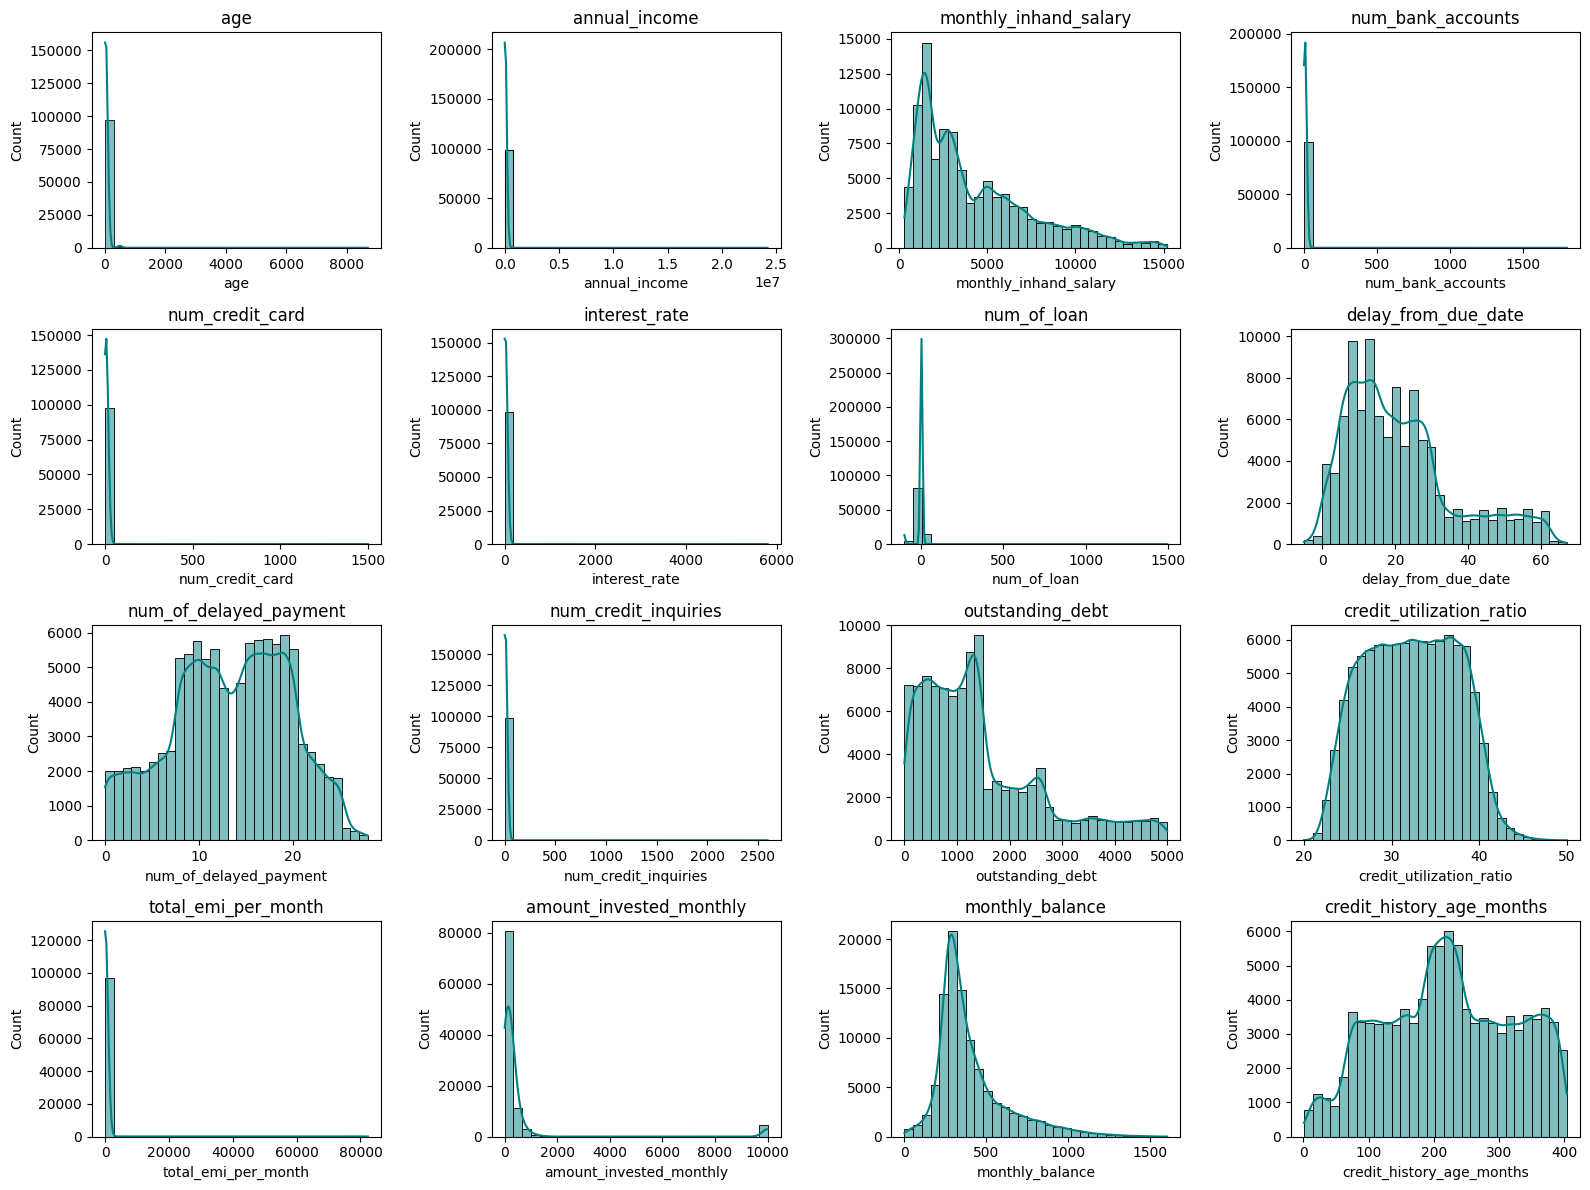

In [104]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(df3.select_dtypes(include=['float32','float64', 'Int64', 'int16','int64']).columns, 1):
    plt.subplot(4, 4, i)  # 4 h√†ng, 5 c·ªôt (tu·ª≥ ch·ªânh theo s·ªë bi·∫øn)
    sns.histplot(df3[col], bins=30, kde=True, color='teal')
    plt.title(col)
    plt.tight_layout()

plt.show()

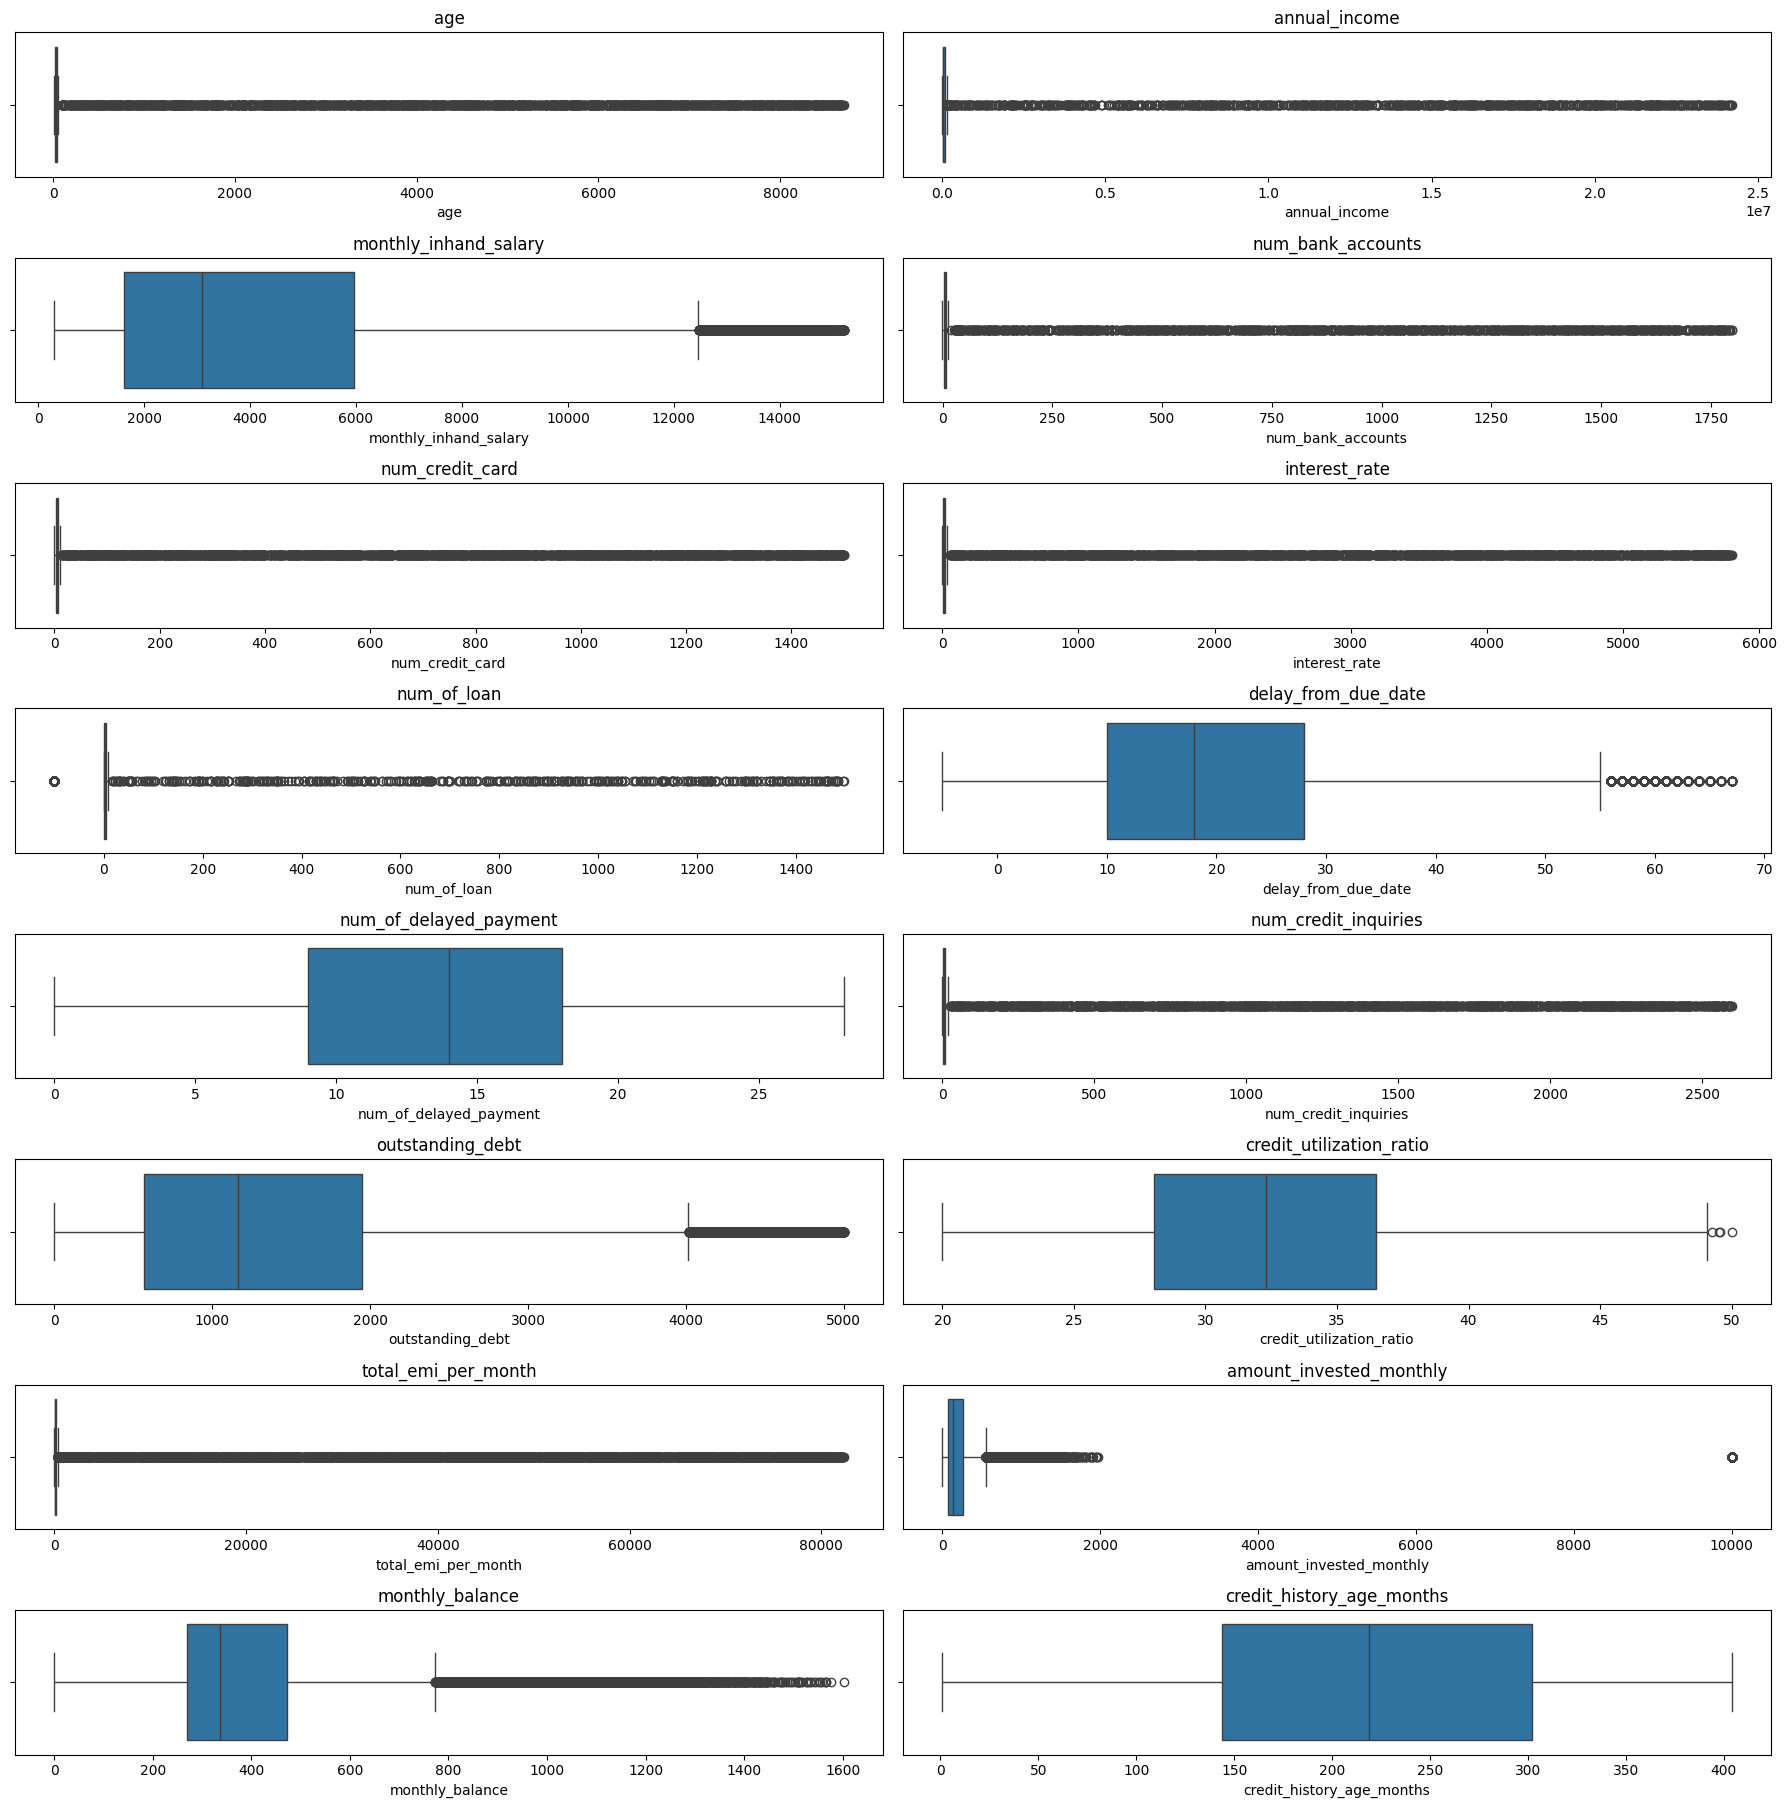

In [105]:
numeric_cols = df3.select_dtypes(include=['float32','float64', 'Int64', 'int16','int64']).columns

plt.figure(figsize=(18, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols)+2)//2, 2, i+1)
    sns.boxplot(x=df3[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# X·ª≠ l√Ω ngo·∫°i lai

# 1. Age

In [106]:
df3[df3['age'] <= 100]['age'].value_counts().sort_index()


age
14     1175
15     1574
16     1455
17     1502
18     2385
19     2793
20     2744
21     2716
22     2785
23     2654
24     2714
25     2861
26     2945
27     2859
28     2968
29     2735
30     2727
31     2955
32     2884
33     2543
34     2837
35     2866
36     2868
37     2742
38     2994
39     2846
40     2609
41     2785
42     2577
43     2734
44     2824
45     2642
46     1621
47     1227
48     1385
49     1375
50     1273
51     1291
52     1356
53     1354
54     1311
55     1366
56      362
95        3
99        1
100       1
Name: count, dtype: int64

- T·ª´ 14 l√† ƒë·ªô tu·ªïi v·ªã th√†nh ni√™n c√≥ th·ªÉ s·∫Ω ch∆∞a ƒë·ªß tu·ªïi ƒë·ªÉ ƒë∆∞·ª£c c·∫•p v√†o s·ª≠ d·ª•ng th·∫ª t√≠n d·ª•ng
- Trong tr∆∞·ªùng h·ª£p b√¨nh th∆∞·ªùng, tu·ªïi c·ªßa con ng∆∞·ªùi gi·ªõi h·∫°n d∆∞·ªõi 100 tu·ªïi, n√™n nh·ªØng ƒë·ªô tu·ªïi v∆∞·ª£t m·ª©c c√≥ th·ªÉ d·ªØ li·ªáu b·ªã ƒëi·ªÅn nh·∫ßm

In [107]:
# hi·ªÉn th·ªã c√°c tu·ªïi tr√™n 100
df3[df3['age'] >= 100]

id customer_id     month              name   age          ssn  \
2       0x1604   CUS_0xd40     March     Aaron Maashoh   500  821-00-0265   
56      0x1656  CUS_0x5407   January              Annk  7580  500-92-6408   
113     0x16ab   CUS_0xff4  February         Poornimaf   500  655-05-7666   
122     0x16b8  CUS_0x33d2     March         Chalmersa   181  965-46-2491   
219     0x1749  CUS_0x3edc     April         Williamso   995  663-16-3845   
...        ...         ...       ...               ...   ...          ...   
99913  0x25f6f  CUS_0x1619  February       Phil Wahbao  2263  683-59-7399   
99937  0x25f93  CUS_0xad4f  February  Sabina Zawadzkig   500  226-45-0652   
99950  0x25fa4  CUS_0x51b3      July             Ryana  1342  837-85-9800   
99963  0x25fb9  CUS_0x372c     April   Lucia Mutikanik   500  340-85-7301   
99972  0x25fc6   CUS_0xf16       May    Maria Sheahanb  1753  868-70-2218   

          occupation  annual_income  monthly_inhand_salary  num_bank_accounts  \
2          Scientist       19114.12            1824.843333                  3   
56     Media_Manager       34081.38            2611.115000                  8   
113     Entrepreneur       25546.26            2415.855000                  8   
122        Scientist       31993.78            2942.148333                  6   
219       Accountant       43070.24            3622.186667                  3   
...              ...            ...                    ...                ...   
99913  Media_Manager       20059.98            1523.665000                  8   
99937      Developer       22620.79            1722.065833                  7   
99950  Media_Manager       59146.36            4908.863333                  3   
99963         Lawyer       42903.79            3468.315833                  0   
99972  Media_Manager       16680.35            1528.029167                  1   

       ...  outstanding_debt  credit_utilization_ratio     credit_history_age  \
2      ...        809.979980                 28.609352  22 Years and 3 Months   
56     ...       1704.180054                 24.448063                    NaN   
113    ...        758.440002                 29.711376  18 Years and 3 Months   
122    ...        818.219971                 27.380109  17 Years and 0 Months   
219    ...       1233.099976                 24.331772  19 Years and 5 Months   
...    ...               ...                       ...                    ...   
99913  ...        909.010010                 25.982154  16 Years and 4 Months   
99937  ...        642.460022                 31.841872                    NaN   
99950  ...        418.029999                 38.199635  20 Years and 7 Months   
99963  ...       1079.479980                 30.625298                    NaN   
99972  ...        897.159973                 37.788217  21 Years and 5 Months   

      payment_of_min_amount  total_emi_per_month  amount_invested_monthly  \
2                        No            49.574949                81.699524   
56                       NM            70.478333               162.441010   
113                     Yes           101.328637               300.323242   
122                     Yes            45.141298               264.257080   
219                     Yes            30.576085                74.920372   
...                     ...                  ...                      ...   
99913                    No            45.076827                74.713577   
99937                    No             0.000000               105.076294   
99950                    No            26.778419               502.376312   
99963                    No            34.975457                31.193920   
99972                    No            41.113561                64.549751   

                      payment_behaviour  monthly_balance credit_score  \
2       Low_spent_Medium_value_payments       331.209863         Good   
56       Low_spent_Large_value_payments       298.192158         Poor 

c√≥ m·ªôt s·ªë kh√°ch h√†ng b·ªã ƒëi·ªÅn sai s·ªë tu·ªïi n√™n ta s·∫Ω chuy·ªÉn c√°c tu·ªïi ko h·ª£p l·ªá ƒë√≥ v·ªÅ null v√† ƒëi·ªÅn l·∫°i d·ª±a v√†o c·ªôt customer_id

In [108]:
# x·ª≠ l√Ω c√°c tu·ªïi ko h·ª£p l·ªá:
df3.loc[df3["age"] > 56, "age"] = pd.NA

df3["age"] = df3.groupby("customer_id")["age"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))


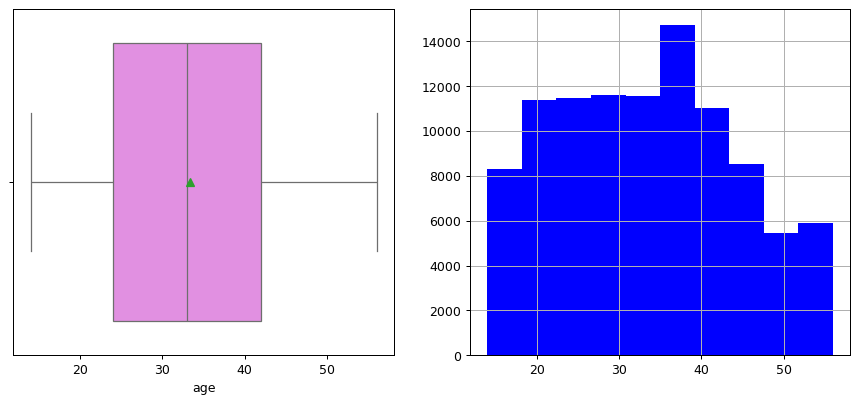

In [109]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.age, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['age'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 2. Monthly_Inhand_Salary


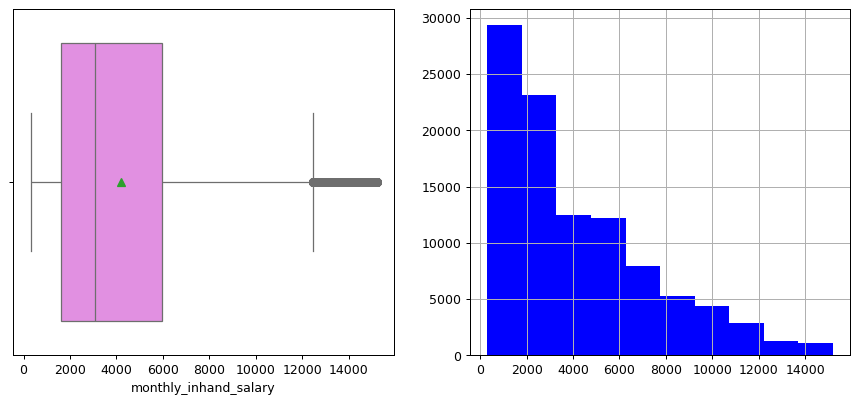

In [110]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.monthly_inhand_salary, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['monthly_inhand_salary'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

In [111]:
df3["monthly_inhand_salary"].value_counts().sample(20)


monthly_inhand_salary
3845.465000     8
6401.840000     8
3437.375000     8
471.978629      3
8039.245000     8
12333.190000    8
892.909167      8
852.418750      8
2522.570833     8
2737.911667     8
3368.011667     8
2387.727500     8
9364.880000     8
5033.970428     3
1666.363333     8
5469.902500     8
1770.481667     8
4951.233333     8
7250.096667     8
1652.343333     2
Name: count, dtype: int64

- M·∫∑c d√π c√°c ngh·ªÅ nghi·ªáp gi·ªëng nhau, nh∆∞ng m·ª©c l∆∞∆°ng c√≥ th·ªÉ kh√°c nhau v√† c√≥ th·ªÉ r·∫•t th·∫•p ho·∫∑c r·∫•t cao. Do ƒë√≥, ch√∫ng ta coi nh·ªØng gi√° tr·ªã ngo·∫°i l·ªá n√†y l√† h·ª£p l·ªá trong b·ªëi c·∫£nh n√†y v√† ch·∫•p nh·∫≠n ch√∫ng l√† ch√≠nh x√°c.

# 3. Annual_Income


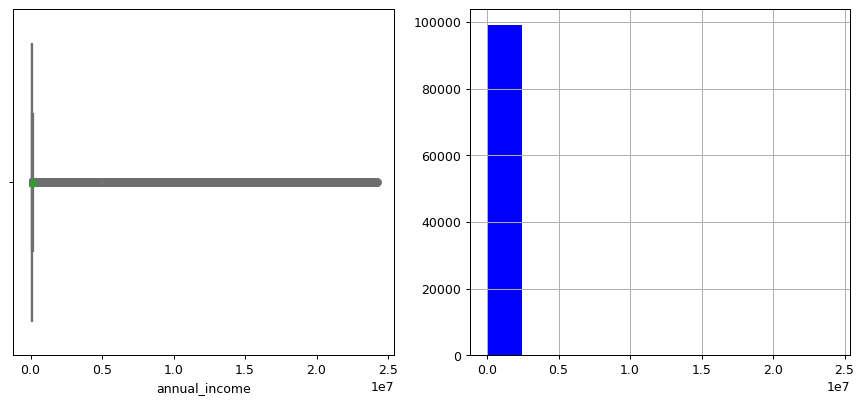

In [112]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.annual_income, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['annual_income'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

In [113]:
df3.groupby("customer_id")["annual_income"].unique().sample(20)

customer_id
CUS_0xa4e2            [125905.84]
CUS_0x857e             [52410.92]
CUS_0x28df    [49023.60000000001]
CUS_0x95c2              [33498.8]
CUS_0x899              [73057.16]
CUS_0x9f06             [94187.25]
CUS_0x1cc3            [154242.48]
CUS_0x4c09             [128501.8]
CUS_0xc075             [17145.07]
CUS_0x981d             [20063.56]
CUS_0x5f90            [12680.815]
CUS_0xb518            [127855.83]
CUS_0x820c             [18642.75]
CUS_0xa094             [18244.44]
CUS_0x8067             [47868.74]
CUS_0x50af             [27311.97]
CUS_0x7072             [35952.25]
CUS_0x344e              [27587.1]
CUS_0x522d             [30092.13]
CUS_0xb2a4             [32755.49]
Name: annual_income, dtype: object

thu nh·∫≠p c·ªßa m·ªôt s·ªë kh√°ch h√†ng c√≥ s·ª± ch√™nh l·ªách r·∫•t l·ªõn c·ª• th·ªÉ ·ªü kh√°ch h√†ng CUS_0x19a9, CUS_0x569b, CUS_0x9b60

In [114]:
# Count the occurrences of each annual_income value within customer groups and summarize their frequency
df3.groupby("customer_id")["annual_income"].value_counts().value_counts()

count
8    11535
1      999
7      933
6       30
5        2
Name: count, dtype: int64

- m·ªôt s·ªë kh√°ch h√†ng c√≥ thu nh·∫≠p kh√¥ng th·ªëng nh·∫•t
- M·ªói kh√°ch h√†ng n√™n c√≥ 1 gi√° tr·ªã duy nh·∫•t (v√≠ d·ª•: 12500) l·∫∑p l·∫°i ƒë·ªß 8 l·∫ßn ‚Üí th·ªÉ hi·ªán r·∫±ng th√¥ng tin thu nh·∫≠p h√†ng nƒÉm l√† ·ªïn ƒë·ªãnh

In [115]:
# ki·ªÉm tra ƒë·ªô nh·∫•t qu√°n gi·ªØa thu nh·∫≠p h√†ng nƒÉm v√† thu nh·∫≠p h√†ng th√°ng: l∆∞∆°ng th√°ng x 12 th√°ng = thu nh·∫≠p
df3[df3["annual_income"] != df3["monthly_inhand_salary"] * 12].head(30)     # l·ªçc c√°c d√≤ng kh√¥ng kh·ªõp c·ªßa 2 m·ª©c l∆∞∆°ng

id customer_id     month             name   age          ssn  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh  23.0  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh  23.0  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  23.0  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh  23.0  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh  23.0  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh  23.0  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh  23.0  821-00-0265   
7   0x1609   CUS_0xd40    August    Aaron Maashoh  23.0  821-00-0265   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj  28.0  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj  28.0  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj  28.0  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj  28.0  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj  28.0  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj  28.0  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj  28.0  004-07-5839   
15  0x1615  CUS_0x21b1    August  Rick Rothackerj  28.0  004-07-5839   
16  0x161a  CUS_0x2dbc   January           Langep  34.0  486-85-3974   
17  0x161b  CUS_0x2dbc  February           Langep  34.0  486-85-3974   
18  0x161c  CUS_0x2dbc     March           Langep  34.0  486-85-3974   
19  0x161d  CUS_0x2dbc     April           Langep  34.0  486-85-3974   
20  0x161e  CUS_0x2dbc       May           Langep  34.0  486-85-3974   
21  0x161f  CUS_0x2dbc      June           Langep  34.0  486-85-3974   
22  0x1620  CUS_0x2dbc      July           Langep  34.0  486-85-3974   
23  0x1621  CUS_0x2dbc    August           Langep  34.0  486-85-3974   
24  0x1626  CUS_0xb891   January           Jasond  54.0  072-31-6145   
25  0x1627  CUS_0xb891  February           Jasond  54.0  072-31-6145   
26  0x1628  CUS_0xb891     March           Jasond  55.0  072-31-6145   
27  0x1629  CUS_0xb891     April           Jasond  55.0  072-31-6145   
28  0x162a  CUS_0xb891       May           Jasond  55.0  072-31-6145   
29  0x162b  CUS_0xb891      June           Jasond  55.0  072-31-6145   

      occupation  annual_income  monthly_inhand_salary  num_bank_accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12            1824.843333                  3   
2      Scientist       19114.12            1824.843333                  3   
3      Scientist       19114.12            1824.843333                  3   
4      Scientist       19114.12            1824.843333                  3   
5      Scientist       19114.12            1824.843333                  3   
6      Scientist       19114.12            1824.843333                  3   
7      Scientist       19114.12            1824.843333                  3   
8        Teacher       34847.84            3037.986667                  2   
9        Teacher       34847.84            3037.986667                  2   
10       Teacher       34847.84            3037.986667                  2   
11       Teacher       34847.84            3037.986667                  2   
12       Teacher       34847.84            3037.986667                  2   
13       Teacher       34847.84            3037.986667                  2   
14       Teacher       34847.84            3037.986667                  2   
15       Teacher       34847.84            3037.986667                  2   
16      Engineer      143162.64           12187.220000                  1   
17      Engineer      143162.64           12187.220000                  1   
18      Engineer      143162.64           12187.220000                  1   
19      Engineer      143162.64           12187.220000                  1   
20      Engineer      143162.64           12187.220000                  1   
21      Engineer      143162.64           12187.220000                  1   
22  

In [116]:
# ki·ªÉm tra ƒë·ªô t∆∞∆°ng ƒë·ªìng gi·ªØa thu nh·∫≠p v√† l∆∞∆°ng th√°ng sau khi tƒÉng
filtered_df = df3[df3["annual_income"] > df3["monthly_inhand_salary"] * 18].head(10)
filtered_df

id customer_id     month                  name   age          ssn  \
54   0x1650  CUS_0x284a      July                Nadiaq  34.0  411-51-0676   
231  0x1759  CUS_0xbffe    August    Dhanya Skariachano  40.0  311-13-7309   
245  0x176f  CUS_0x9a71      June         Mukhopadhyayc  55.0  889-07-2357   
361  0x181f  CUS_0x8e9b  February    Rachelle Younglaic  15.0  925-51-5335   
368  0x182a  CUS_0x609d   January              Shupingu  27.0  911-47-6879   
379  0x1839  CUS_0x75c6     April      "John ODonnell"p  30.0  587-65-8904   
420  0x1876  CUS_0xbe1b       May             Kazunorit  44.0  853-17-1579   
564  0x194e  CUS_0x2827       May                 Lisah  18.0  486-07-1289   
602  0x1988  CUS_0x36ab     March  Svea Herbst-Baylisss  15.0  925-44-1671   
617  0x199f  CUS_0x6856  February               Gellerp  24.0  251-77-0979   

       occupation  annual_income  monthly_inhand_salary  num_bank_accounts  \
54         Lawyer     10909427.0           10469.207759                  0   
231     Architect      6515990.0            2210.032500                  6   
245     Scientist       586359.0            1684.168333                  1   
361  Entrepreneur     18334118.0            4369.482500                 10   
368     Architect     19717385.0            1057.435833                  7   
379       Teacher      2709655.0            7489.973333                  2   
420     Developer      2592822.0            1012.480000                  8   
564     Scientist     19257912.0           11809.560000                  0   
602       Teacher     22335783.0            3580.457500                 10   
617       Teacher     16367214.0           10795.632500                  1   

     ...  outstanding_debt  credit_utilization_ratio      credit_history_age  \
54   ...        352.160004                 26.947565   31 Years and 1 Months   
231  ...        400.070007                 23.177617  30 Years and 10 Months   
245  ...        413.320007                 28.836349   18 Years and 8 Months   
361  ...       3422.489990                 36.729939   10 Years and 6 Months   
368  ...       2797.169922                 25.314339  13 Years and 11 Months   
379  ...        680.770020                 26.447282  20 Years and 11 Months   
420  ...       4071.620117                 26.429152                     NaN   
564  ...       1045.109985                 39.203825   23 Years and 3 Months   
602  ...       2174.159912                 37.351407                     NaN   
617  ...        137.149994                 30.729061   26 Years and 8 Months   

    payment_of_min_amount  total_emi_per_month  amount_invested_monthly  \
54                     No           911.220179               930.391907   
231                   Yes            69.602920                51.830860   
245                    No            29.534584                68.956726   
361                   Yes           314.901785               124.541473   
368                   Yes            58.868441                60.550785   
379                    No           121.682017               264.206665   
420                   Yes            81.712655                24.679348   
564                    No           136.988557             10000.000000   
602                   Yes           162.238963               230.389389   
617                    No           389.305672               511.211426   

                    payment_behaviour  monthly_balance credit_score  \
54    High_spent_Large_value_payments       326.241830         Good   
231   High_spent_Large_value_payments       339.569471     Standard   
245  High_spent_Medium_value_payments       319.925525         Good   
361   High_spent_Small_value_payments       257.504994     Standard   
368   High_spent_Small_value_payments       246.324357     Standard   
379    Low_spent_Small_value_payments       653.108643     Standard   
420    Low_spent_Small_value_payments       179.109536         Poor   
564    Low_spent

- M·∫∑c d√π ƒë√£ tƒÉng l∆∞∆°ng th√°ng nh√¢n 18(+ ti·ªÅn th∆∞·ªüng, ph·ª• c·∫•p th√™m, thu nh·∫≠p ngo√†i,...) nh∆∞ng v·∫´n c√≥ c√°c gi√° tr·ªã v∆∞·ª£t m·ª©c cho ph√©p ƒëi·ªÅu ƒë√≥ ch·ª©ng minh n√≥ l√† ngo·∫°i lai ho·∫∑c c√≥ th·ªÉ b·ªã ƒëi·ªÅn nh·∫ßm

In [117]:
# T√≠nh mode (gi√° tr·ªã ph·ªï bi·∫øn nh·∫•t) c·ªßa annual_income cho t·ª´ng customer_id
filtered_df = df3.groupby("customer_id")["annual_income"].agg(
    lambda x: x.mode().iloc[0])
# Thay th·∫ø annual_income n·∫øu v∆∞·ª£t qu√° 18 l·∫ßn monthly_inhand_salary
df3.loc[df3["annual_income"] > df3["monthly_inhand_salary"] * 18,
        "annual_income"] = df3["customer_id"].map(filtered_df)

In [118]:
df3.groupby("customer_id")["annual_income"].value_counts().value_counts()


count
8    12500
Name: count, dtype: int64

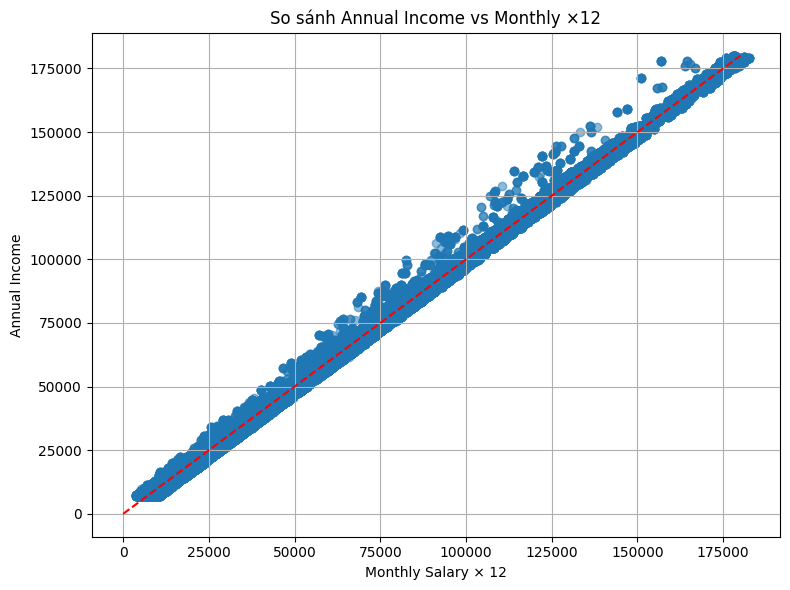

In [119]:
plt.figure(figsize=(8, 6))
plt.scatter(df3["monthly_inhand_salary"] * 12, df3["annual_income"], alpha=0.5)
plt.plot([0, df3["annual_income"].max()], [0, df3["annual_income"].max()], color='red', linestyle='--')
plt.xlabel("Monthly Salary √ó 12")
plt.ylabel("Annual Income")
plt.title("So s√°nh Annual Income vs Monthly √ó12")
plt.grid(True)
plt.tight_layout()
plt.show()



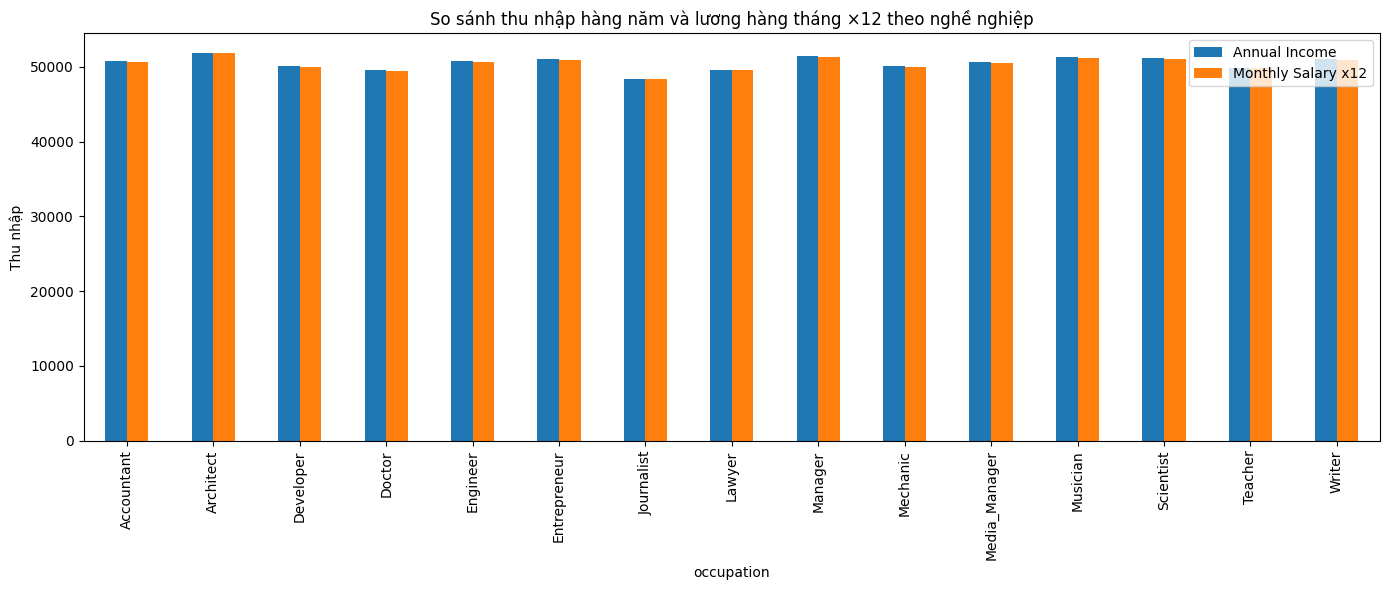

In [120]:
# T√≠nh trung b√¨nh cho m·ªói ngh·ªÅ
mean_salary = df3.groupby("occupation")["monthly_inhand_salary"].mean() * 12
mean_annual = df3.groupby("occupation")["annual_income"].mean()

# T·∫°o DataFrame m·ªõi ƒë·ªÉ v·∫Ω song song
summary_df = pd.DataFrame({
    "Annual Income": mean_annual,
    "Monthly Salary x12": mean_salary
}).reset_index()

# V·∫Ω bi·ªÉu ƒë·ªì
summary_df.plot(x="occupation", kind="bar", figsize=(14, 6))
plt.title("So s√°nh thu nh·∫≠p h√†ng nƒÉm v√† l∆∞∆°ng h√†ng th√°ng √ó12 theo ngh·ªÅ nghi·ªáp")
plt.ylabel("Thu nh·∫≠p")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- quan x√°t bi·ªÉu ƒë·ªì ta nh·∫≠n th·∫•y r·∫±ng m·ª©c trung b√¨nh ·ªü c·∫£ hai bi·ªÉu ƒë·ªì c√≥ xu h∆∞·ªõng ƒë·ªìng nh·∫•t ho·∫∑c t∆∞∆°ng ·ª©ng v·ªõi nhau (t·ª©c l√† m·ª©c thu nh·∫≠p h√†ng th√°ng * 12 ‚âà thu nh·∫≠p h√†ng nƒÉm).

# 4. Num_Bank_Accounts(s·ªë t√†i kho·∫£n ng√¢n h√†ng)


In [121]:
df3["num_bank_accounts"].value_counts().sort_index().head(40)

num_bank_accounts
-1        21
 0      4328
 1      4490
 2      4304
 3     11950
 4     12186
 5     12118
 6     13001
 7     12823
 8     12765
 9      5443
 10     5247
 11        9
 18        1
 26        1
 27        1
 28        3
 29        1
 30        1
 31        1
 32        1
 33        2
 34        4
 35        1
 37        3
 38        1
 39        3
 40        1
 41        1
 42        2
 43        4
 45        1
 49        1
 50        1
 53        1
 55        1
 57        2
 59        1
 60        1
 61        1
Name: count, dtype: int64

- Theo th·ªëng k√™ ta th·∫•y c√≥ gi√° tr·ªã -1 v√† 11 l√† kh√¥ng h·ª£p l·ªá ƒë·ªëi v·ªõi s·ªë l∆∞·ª£ng t√†i kho·∫£n ng√¢n h√†ng


In [122]:
df3.loc[(df3["num_bank_accounts"] < 0) | (df3["num_bank_accounts"] > 11),
        "num_bank_accounts"] = pd.NA
# ƒëi·ªÅn c√°c gi√° tr·ªã thi·∫øu b·∫±ng customer_id
df3["num_bank_accounts"] = df3.groupby(
    "customer_id")["num_bank_accounts"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))


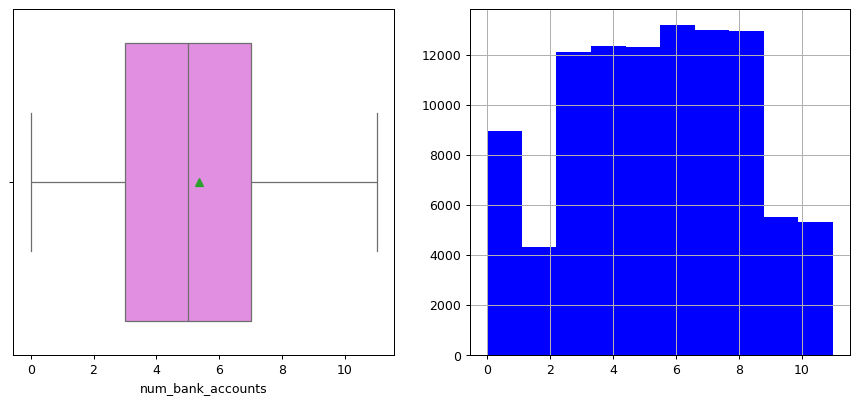

In [123]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_bank_accounts, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_bank_accounts'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 5. Num_Credit_Card


In [124]:
df3["num_credit_card"].value_counts().sort_index().head(20)

num_credit_card
0        13
1      2132
2      2149
3     13277
4     14030
5     18459
6     16559
7     16615
8      4956
9      4643
10     4860
11       36
15        3
16        2
17        1
18        1
20        1
21        1
22        2
24        1
Name: count, dtype: int64

In [125]:
# chuy·ªÉn c√°c gi√° tr·ªã ko h·ª£p l·ªá
df3.loc[df3["num_credit_card"] > 11, "num_credit_card"] = pd.NA
df3["num_credit_card"] = df3.groupby(
    "customer_id")["num_credit_card"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))


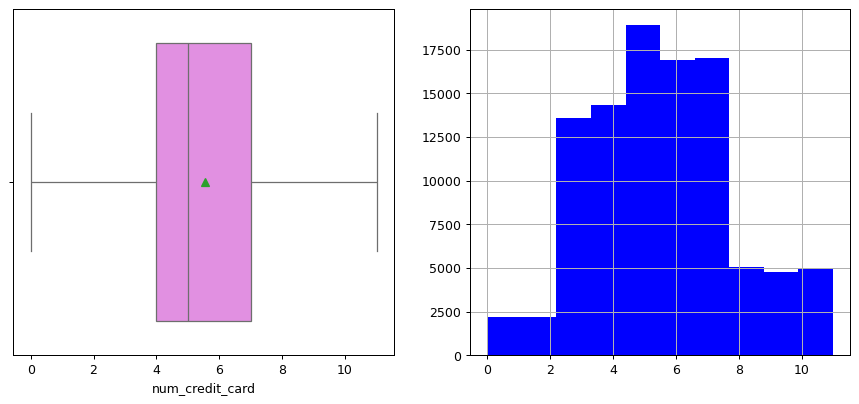

In [126]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_credit_card, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_credit_card'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 6. Interest_Rate(l√£i su·∫•t)


In [127]:
df3.interest_rate.value_counts().sort_index().head(50)

interest_rate
1     2683
2     2465
3     2765
4     2589
5     4979
6     4721
7     4494
8     5012
9     4494
10    4540
11    4428
12    4540
13    2384
14    2229
15    3992
16    3730
17    3813
18    4102
19    3630
20    3929
21    1560
22    1720
23    1683
24    1685
25    1566
26    1489
27    1608
28    1616
29    1662
30    1690
31    1457
32    1742
33    1467
34    1502
59       1
60       1
64       1
67       1
73       1
74       1
75       2
76       2
77       1
81       1
87       1
89       1
91       1
92       1
94       1
95       2
Name: count, dtype: int64

v√¨ l√£i su·∫•t c√≥ th·ªÉ m·ªói th√°ng s·∫Ω kh√°c nhau n√™n ƒë·ªÉ d·ªØ li·ªáu v·∫´n gi·ªØ nguy√™n ƒë∆∞·ª£c √Ω nghƒ©a ban ƒë·∫ßu th√¨ ta s·∫Ω ƒëi·ªÅn b·∫±ng mode

In [128]:
df3.loc[df3["interest_rate"] > 34, "interest_rate"] = pd.NA
df3["interest_rate"] = df3.groupby("customer_id")["interest_rate"].transform(
    lambda x: x.fillna(x.mode()[0]))

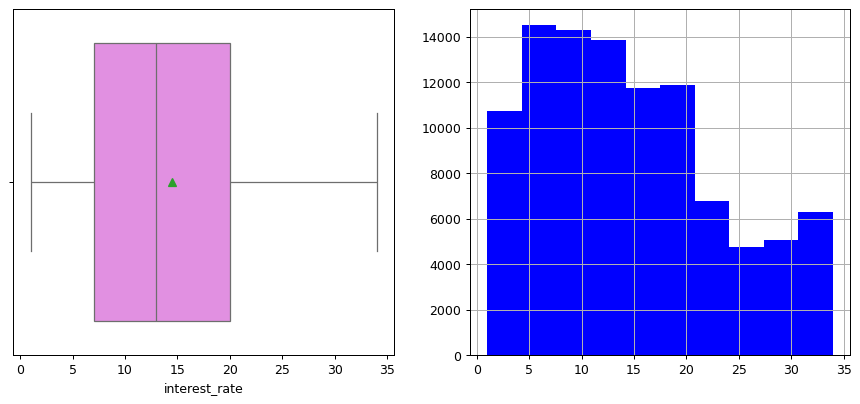

In [129]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.interest_rate, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['interest_rate'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 7. Num_Of_Loan(s·ªë kho·∫£n vay)


In [130]:
df3["num_of_loan"].value_counts().sort_index().head(20)

num_of_loan
-100     3876
 0      10930
 1      10606
 2      15032
 3      15104
 4      14743
 5       7197
 6       7803
 7       7344
 8       3191
 9       3702
 17         1
 18         1
 19         1
 23         2
 27         1
 29         1
 31         2
 32         1
 33         2
Name: count, dtype: int64

In [131]:
# chuy·ªÉn c√°c gi√° tr·ªã ko h·ª£p l·ªá b·∫±ng null
df3.loc[(df3["num_of_loan"] < 0) | (df3["num_of_loan"] > 9), "num_of_loan"] = pd.NA

df3["num_of_loan"] = df3.groupby("customer_id")["num_of_loan"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))


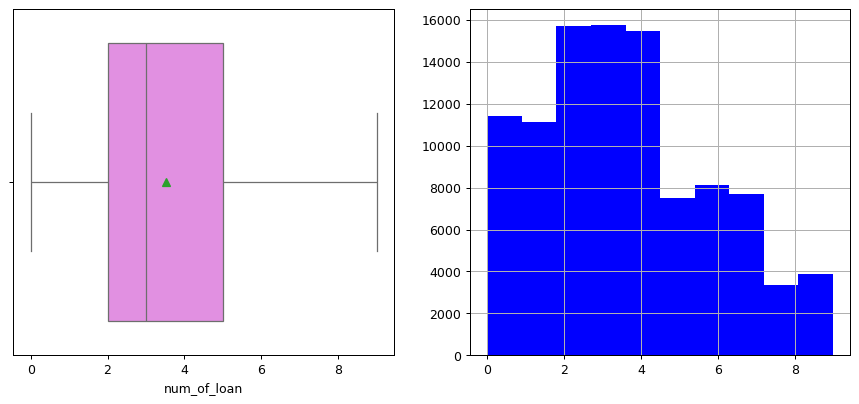

In [132]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_of_loan, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_of_loan'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 8. Delay_From_Due_Date


In [133]:
df3["delay_from_due_date"].value_counts().sort_index().head(30)

delay_from_due_date
-5       33
-4       62
-3      118
-2      168
-1      210
 0     1195
 1     1326
 2     1342
 3     1686
 4     1722
 5     3042
 6     3137
 7     3234
 8     3324
 9     3233
 10    3281
 11    3182
 12    3141
 13    3424
 14    3313
 15    3596
 16    2566
 17    2524
 18    2637
 19    2638
 20    2489
 21    2411
 22    2334
 23    2387
 24    2533
Name: count, dtype: int64

In [134]:
# chuy·ªÉn ƒë·ªïi c√°c gi√° tr·ªã √¢m th√†nh gi√° tr·ªã d∆∞∆°ng:
df3["delay_from_due_date"] = df3["delay_from_due_date"].abs()

# 9. Num_Credit_Inquiries


In [135]:
df3["num_credit_inquiries"].value_counts().sort_index().head(30)

num_credit_inquiries
0.0      7126
1.0      7739
2.0      8230
3.0      9068
4.0     11527
5.0      5790
6.0      8249
7.0      8218
8.0      8006
9.0      5380
10.0     5036
11.0     5149
12.0     4663
13.0     1506
14.0     1055
15.0      824
16.0      464
17.0      290
26.0        1
29.0        1
31.0        4
32.0        2
33.0        1
34.0        1
37.0        1
43.0        1
45.0        1
46.0        2
49.0        1
52.0        2
Name: count, dtype: int64

In [136]:
# chuy·ªÉn c√°c gi√° tr·ªã ko h·ª£p l·ªá b·∫±ng null
df3.loc[(df3["num_credit_inquiries"] > 17), "num_credit_inquiries"] = pd.NA
df3["num_credit_inquiries"] = df3.groupby("customer_id")["num_credit_inquiries"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))


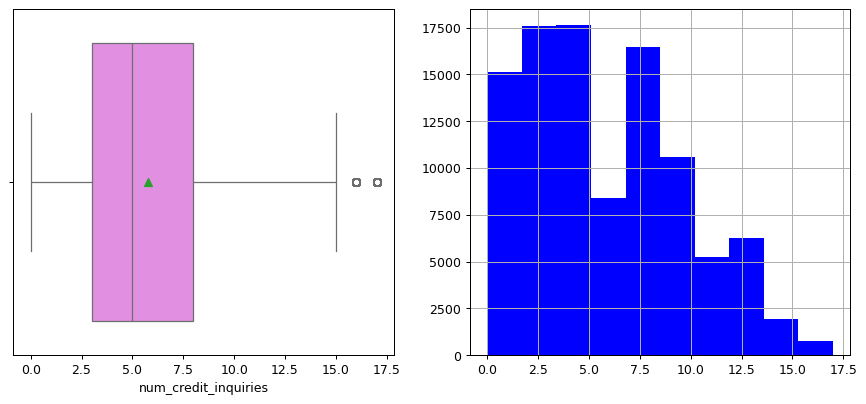

In [137]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_credit_inquiries, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_credit_inquiries'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 10. Outstanding_Debt


In [138]:
df3["outstanding_debt"].value_counts().sort_index().head(20)

outstanding_debt
0.23     8
0.34     8
0.54     8
0.56     8
0.77     8
0.95    16
1.20     8
1.23     8
1.30     8
1.33     8
1.37     8
1.42     8
1.48     8
2.04     8
2.13     8
2.43     8
3.31     8
3.50     8
3.68     8
3.74     8
Name: count, dtype: int64

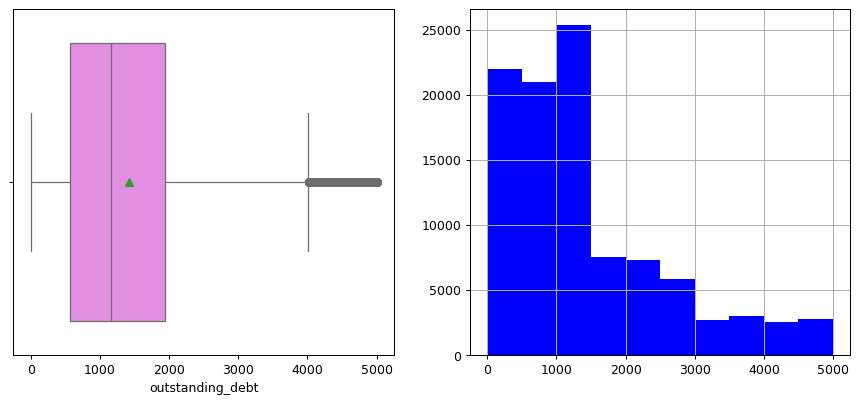

In [139]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.outstanding_debt, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['outstanding_debt'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 11. Credit_Utilization_Ratio


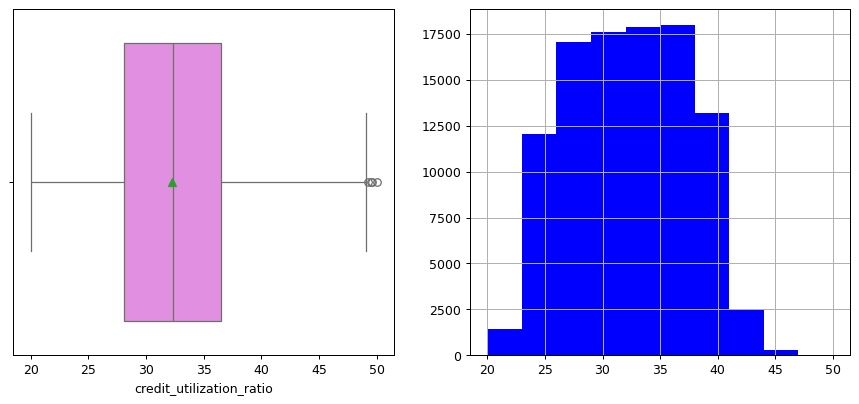

In [140]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.credit_utilization_ratio, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['credit_utilization_ratio'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 12. Total_Emi_Per_Month


In [141]:
df3.groupby("customer_id")["total_emi_per_month"].value_counts().value_counts()


count
8    9074
1    3385
7    2524
6     504
4     270
3     233
2     226
5     220
Name: count, dtype: int64

In [142]:
df3.groupby("customer_id")["total_emi_per_month"].nunique().value_counts()


total_emi_per_month
1    9074
2    2950
3     446
4      26
5       4
Name: count, dtype: int64

In [143]:
df3.groupby('customer_id')['total_emi_per_month'].transform('nunique').value_counts()

total_emi_per_month
1    72592
2    23600
3     3568
4      208
5       32
Name: count, dtype: int64

In [144]:
df3['total_emi_per_month'] = df3.groupby('customer_id')['total_emi_per_month'].transform(
    lambda x: x.mode().iloc[0] if len(x.unique()) > 1 else x.iloc[0])

In [145]:
df3.groupby("customer_id")["total_emi_per_month"].value_counts().value_counts()


count
8    12500
Name: count, dtype: int64

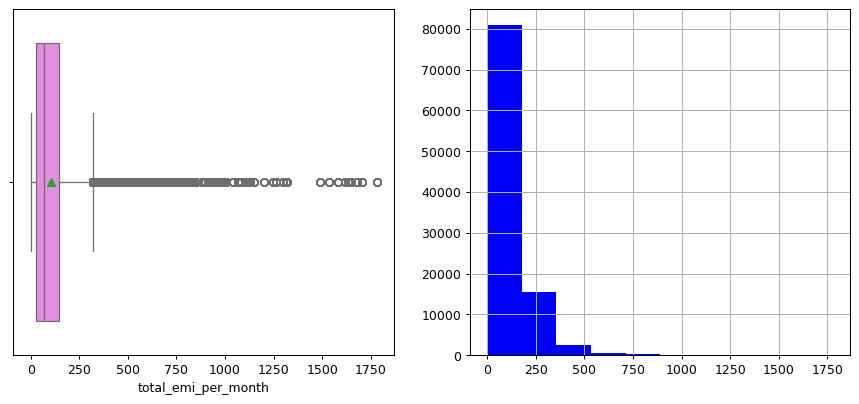

In [146]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.total_emi_per_month, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['total_emi_per_month'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 13. Amount_Invested_Monthly(s·ªë ti·ªÅn ƒë·∫ßu t∆∞ h√†ng th√°ng)


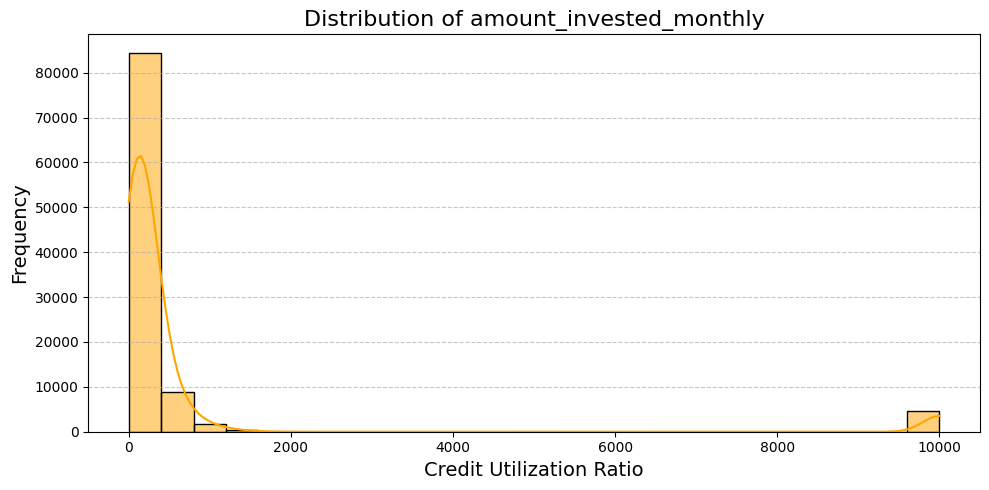

In [147]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="amount_invested_monthly", bins=25, kde=True, color='orange')

plt.title('Distribution of amount_invested_monthly', fontsize=16)
plt.xlabel('Credit Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

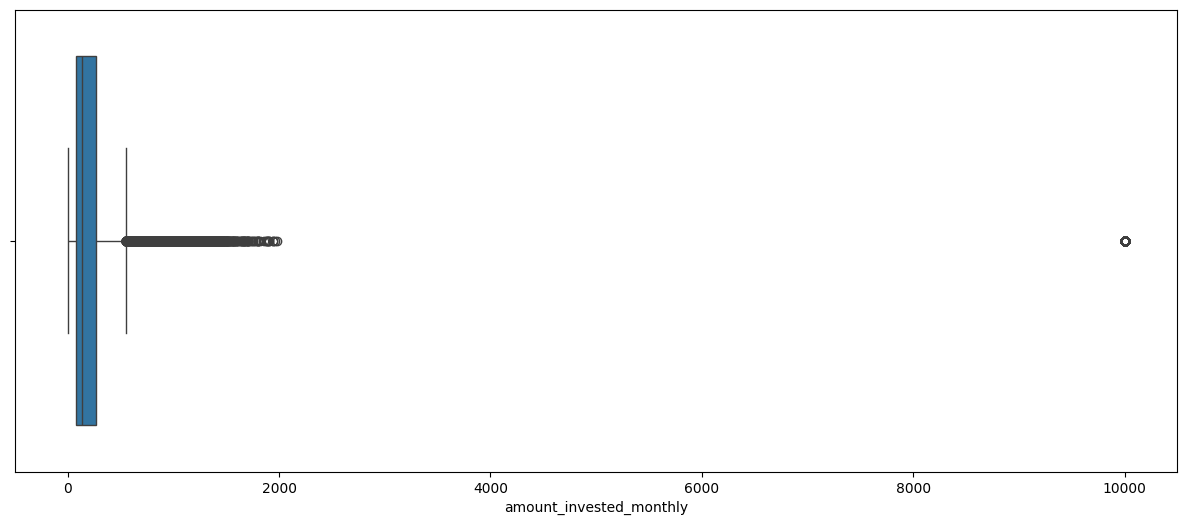

In [148]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df3, x='amount_invested_monthly')
plt.show()

array([[<Axes: title={'center': 'monthly_inhand_salary'}>]], dtype=object)

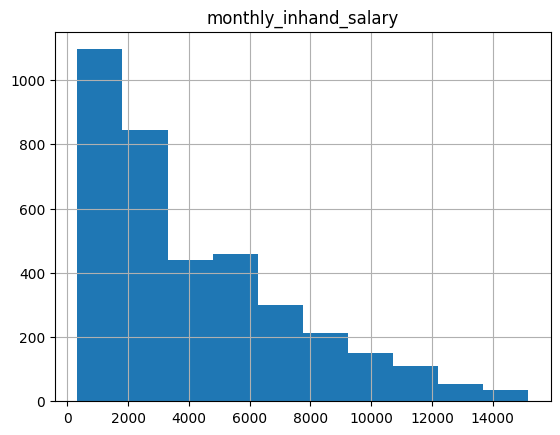

In [149]:
salary_by_customer = df3[df3['amount_invested_monthly'] == 10000].groupby('customer_id')['monthly_inhand_salary'].mean().reset_index()
salary_by_customer.hist()

# 14. Monthly_Balance

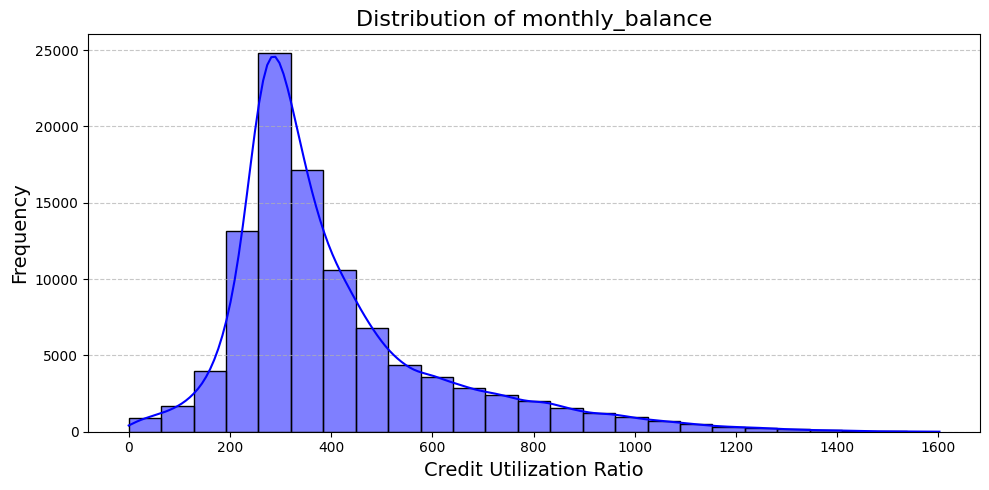

In [150]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="monthly_balance", bins=25, kde=True, color='blue')

plt.title('Distribution of monthly_balance', fontsize=16)
plt.xlabel('Credit Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

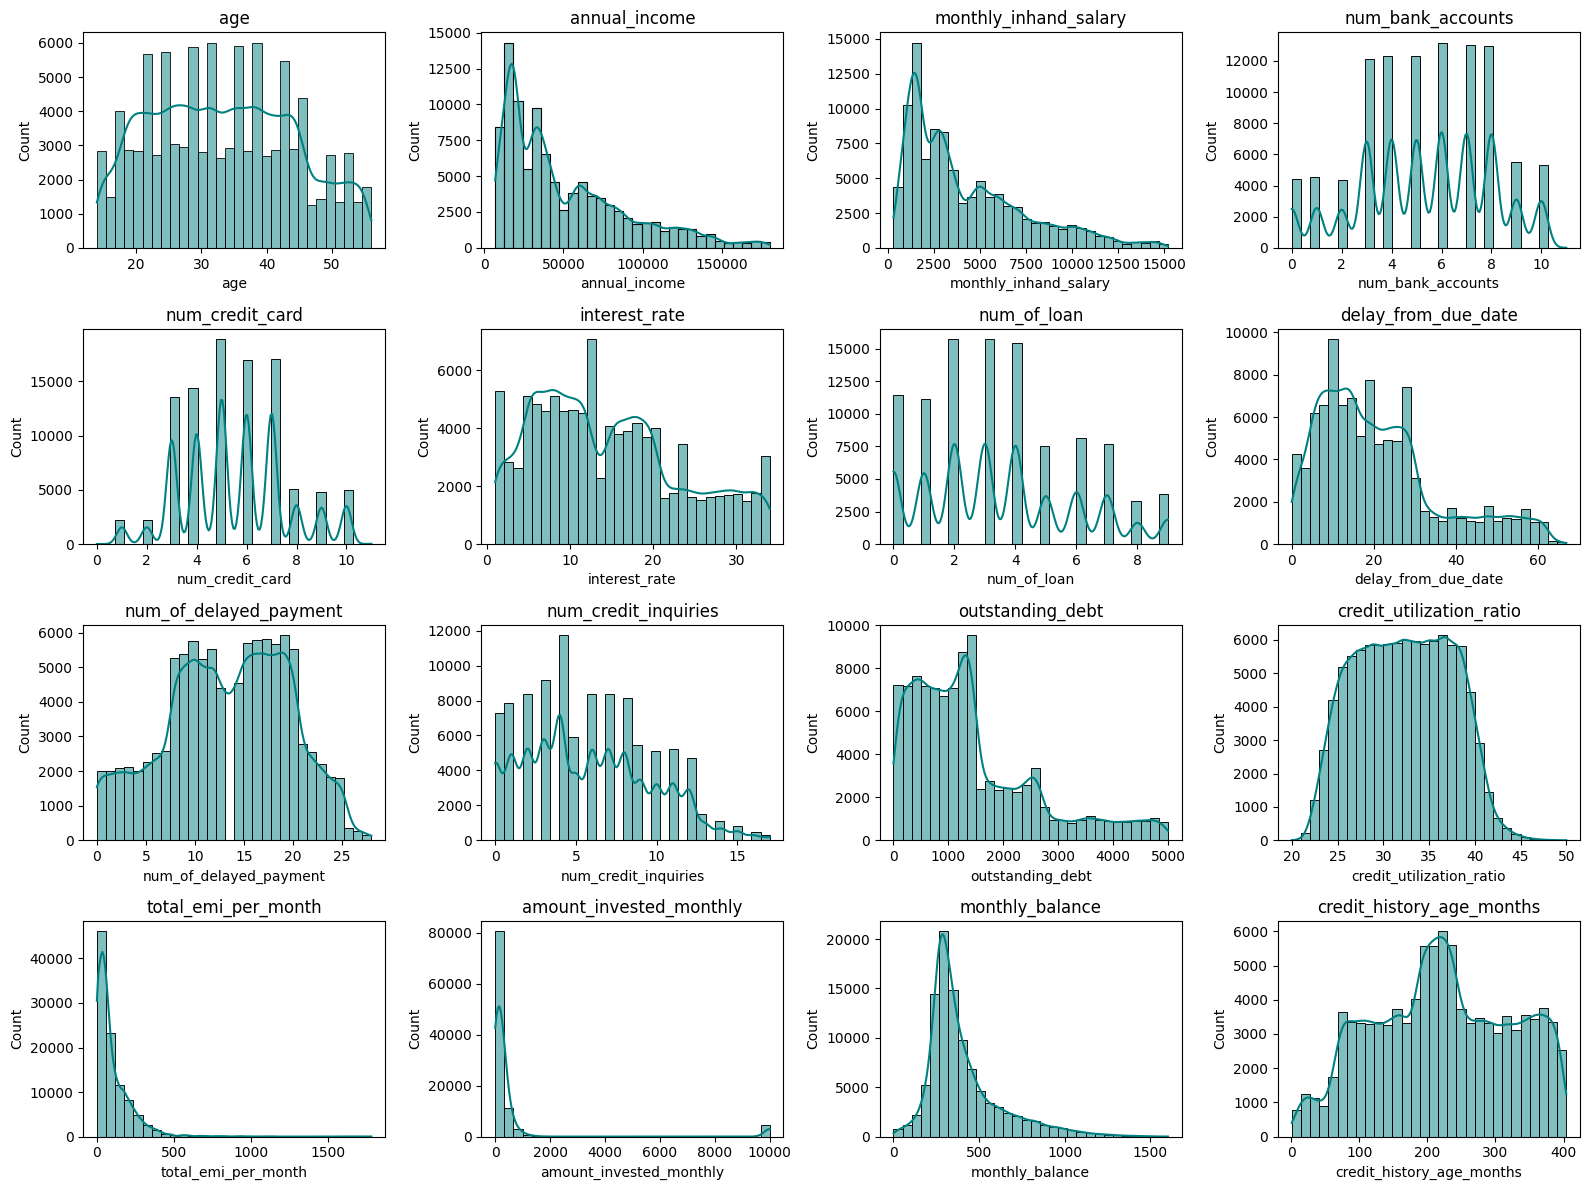

In [151]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(df3.select_dtypes(include=['float32','float64', 'Int64', 'int16','int64']).columns, 1):
    plt.subplot(4, 4, i)  # 4 h√†ng, 5 c·ªôt (tu·ª≥ ch·ªânh theo s·ªë bi·∫øn)
    sns.histplot(df3[col], bins=30, kde=True, color='teal')
    plt.title(col)
    plt.tight_layout()

plt.show()

# X·ª≠ l√Ω d·ªØ li·ªáu Category

In [152]:
df4=df3.copy()

In [153]:
df4.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score', 'credit_history_age_months'],
      dtype='object')

In [154]:
df4["type_of_loan"] = df4["type_of_loan"].apply(lambda x: x if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
loan_encoded = mlb.fit_transform(df4["type_of_loan"])
loan_encoded_df = pd.DataFrame(loan_encoded, columns=mlb.classes_)
loan_encoded_df.head()
df_cat = loan_encoded_df
# Gh√©p l·∫°i v·ªõi DataFrame g·ªëc
# df_cat = pd.concat([df4.drop(columns=["type_of_loan"]), loan_encoded_df], axis=1)

In [155]:
# Credit_Mix: Bad = 0, Standard = 1, Good = 2
credit_mix_mapping = {
    'Bad': 0,
    'Standard': 1,
    'Good': 2
}
df4['credit_mix'] = df4['credit_mix'].map(credit_mix_mapping)


Credit_Mix cho bi·∫øt s·ª± ƒëa d·∫°ng trong c√°c lo·∫°i kho·∫£n vay c·ªßa kh√°ch h√†ng (th·∫ø ch·∫•p, t√≠n ch·∫•p, th·∫ª t√≠n d·ª•ng, v.v.).

Bad (0): Danh m·ª•c t√≠n d·ª•ng k√©m (c√≥ th·ªÉ ch·ªâ c√≥ m·ªôt lo·∫°i t√≠n d·ª•ng ho·∫∑c c√≥ l·ªãch s·ª≠ t√≠n d·ª•ng x·∫•u).

Standard (1): Danh m·ª•c t√≠n d·ª•ng ·ªü m·ª©c ch·∫•p nh·∫≠n ƒë∆∞·ª£c.

Good (2): Danh m·ª•c t√≠n d·ª•ng t·ªët, th∆∞·ªùng c√≥ nhi·ªÅu lo·∫°i t√≠n d·ª•ng ƒë∆∞·ª£c qu·∫£n l√Ω t·ªët.

In [156]:
df4.payment_of_min_amount.value_counts(dropna=False)

payment_of_min_amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [157]:
#There is no customer_id that has Yes, No and NM values
(df4.groupby("customer_id")["payment_of_min_amount"].nunique() == 3).sum()

0

In [158]:
df4.groupby([
    "customer_id"
]).payment_of_min_amount.value_counts(dropna=False).value_counts()

count
7    4906
1    4906
8    4491
6    2330
2    2330
5     675
3     675
4     196
Name: count, dtype: int64

In [159]:
#There is no customer_id its all values are NM
df4.groupby("customer_id")["payment_of_min_amount"].apply(
    lambda x: (x == "NM").all()).sum()

0

In [160]:
#If there is a NM value, fill with other value
df4["payment_of_min_amount"] = df3.groupby(
    "customer_id")["payment_of_min_amount"].transform(
        lambda x: x.replace("NM", x[x != "NM"].iloc[0]))


In [161]:
# Payment_of_Min_Amount: No = 0, Yes = 1, NM (No Mention) = -1
payment_min_mapping = {
    'No': 0,
    'Yes': 1,
    # 'NM': -1
}
df_cat['payment_of_min_amount'] = df4['payment_of_min_amount'].map(payment_min_mapping)


cho bi·∫øt kh√°ch h√†ng c√≥ thanh to√°n s·ªë ti·ªÅn t·ªëi thi·ªÉu trong k·ª≥ hay kh√¥ng.

No (0): Kh√¥ng thanh to√°n kho·∫£n t·ªëi thi·ªÉu ‚Üí c√≥ nguy c∆° n·ª£ x·∫•u.

Yes (1): C√≥ thanh to√°n kho·∫£n t·ªëi thi·ªÉu ‚Üí qu·∫£n l√Ω t√≠n d·ª•ng t·ªët h∆°n.

NM (-1): No Mention (kh√¥ng c√≥ th√¥ng tin) ‚Üí gi√° tr·ªã thi·∫øu, t·∫°m m√£ h√≥a l√† -1 ƒë·ªÉ ph√¢n bi·ªát.

In [162]:
df4['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [163]:
# Payment_Behaviour: m√£ h√≥a 6 nh√≥m c·ª• th·ªÉ
payment_behaviour_mapping = {
    'High_spent_Large_value_payments': 0,
    'High_spent_Medium_value_payments': 1,
    'High_spent_Small_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'Low_spent_Medium_value_payments': 4,
    'Low_spent_Small_value_payments': 5
}
df_cat['payment_behaviour'] = df4['payment_behaviour'].map(payment_behaviour_mapping)


m√¥ t·∫£ h√†nh vi chi ti√™u v√† thanh to√°n c·ªßa kh√°ch h√†ng:

High_spent: Chi ti√™u nhi·ªÅu

Low_spent: Chi ti√™u √≠t

Large/Medium/Small_value_payments: Tr·ªã gi√° kho·∫£n thanh to√°n l·ªõn, trung b√¨nh, nh·ªè

‚Üí M√£ h√≥a theo k·∫øt h·ª£p m·ª©c ƒë·ªô chi ti√™u v√† thanh to√°n. Gi√° tr·ªã s·ªë 0‚Äì5 kh√¥ng c√≥ th·ª© t·ª± t·ª± nhi√™n r√µ r√†ng n√™n m√¥ h√¨nh c√¢y (tree-based) th∆∞·ªùng ph√π h·ª£p h∆°n h·ªìi quy tuy·∫øn t√≠nh.



In [164]:
# Credit_Score: Poor = 0, Standard = 1, Good = 2
credit_score_mapping = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}
df_cat['credit_score'] = df4['credit_score'].map(credit_score_mapping)


ƒêi·ªÉm t√≠n d·ª•ng t·ªïng th·ªÉ c·ªßa kh√°ch h√†ng:

Poor (0): R·ªßi ro cao

Standard (1): M·ª©c trung b√¨nh

Good (2): T√≠n nhi·ªám cao

In [165]:
# M√£ h√≥a c·ªôt month
df4.month.unique()

month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

df4['month'] = df4['month'].map(month_mapping)


In [166]:
# m√£ h√≥a c·ªôt occupation
df4.occupation.unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [167]:
df_cat

Auto Loan  Credit-Builder Loan  Debt Consolidation Loan  \
0              1                    1                        0   
1              1                    1                        0   
2              1                    1                        0   
3              1                    1                        0   
4              1                    1                        0   
...          ...                  ...                      ...   
99995          1                    0                        0   
99996          1                    0                        0   
99997          1                    0                        0   
99998          1                    0                        0   
99999          1                    0                        0   

       Home Equity Loan  Mortgage Loan  No Loan  Not Specified  Payday Loan  \
0                     1              0        0              0            0   
1                     1              0        0              0            0   
2                     1              0        0              0            0   
3                     1              0        0              0            0   
4                     1              0        0              0            0   
...                 ...            ...      ...            ...          ...   
99995                 0              0        0              0            0   
99996                 0              0        0              0            0   
99997                 0              0        0              0            0   
99998                 0              0        0              0            0   
99999                 0              0        0              0            0   

       Personal Loan  Student Loan  payment_of_min_amount  payment_behaviour  \
0                  1             0                      0                  2   
1                  1             0                      0                  3   
2                  1             0                      0                  4   
3                  1             0                      0                  5   
4                  1             0                      0                  1   
...              ...           ...                    ...                ...   
99995              0             1                      0                  0   
99996              0             1                      0                  1   
99997              0             1                      0                  0   
99998              0             1                      0                  3   
99999              0             1                      0                  3   

       credit_score  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  
...             ...  
99995             0  
99996             0  
99997             0  
99998             1  
99999             0  

[100000 rows x 13 columns]

# Ki·ªÉm tra m·∫•t c√¢n b·∫±ng l·ªõp

# Bi·ªÉu ƒë·ªì t∆∞∆°ng quan 

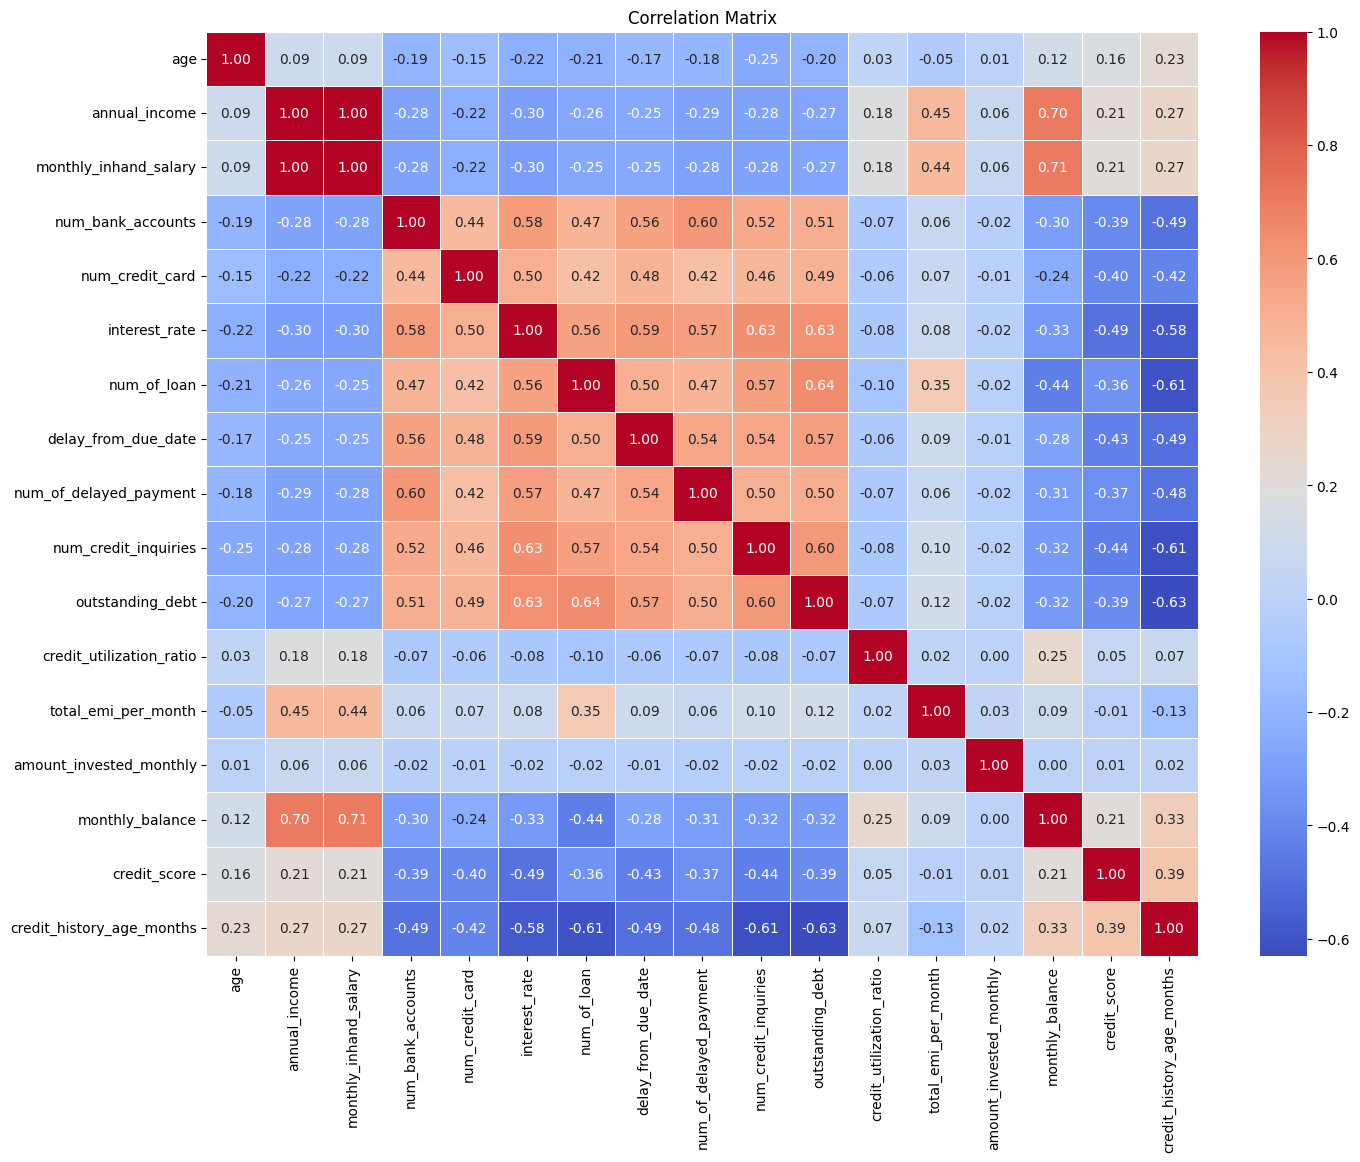

In [168]:
# Correlation of target variable with features after numerical transformation 
df3['credit_score'] = df_cat['credit_score']
corr_matrix = df3.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [169]:
def remove_highly_correlated_features(df, threshold=0.9):
    # Ch·ªâ l·∫•y c√°c c·ªôt s·ªë
    corr_matrix = df.corr(numeric_only=True).abs()

    # L·∫•y upper triangle (tam gi√°c tr√™n) ƒë·ªÉ tr√°nh tr√πng l·∫∑p
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # T√¨m c√°c c·ªôt c√≥ t∆∞∆°ng quan l·ªõn h∆°n ng∆∞·ª°ng
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"C√°c c·ªôt b·ªã lo·∫°i do t∆∞∆°ng quan cao (> {threshold}): {to_drop}")
    df_reduced = df.drop(columns=to_drop)

remove_highly_correlated_features(df3)

C√°c c·ªôt b·ªã lo·∫°i do t∆∞∆°ng quan cao (> 0.9): ['monthly_inhand_salary']


<Axes: >

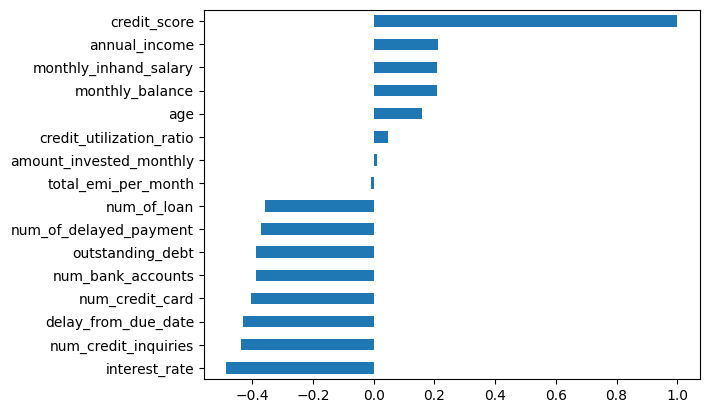

In [170]:
correlation_series = corr_matrix['credit_score'][:-1].sort_values()
correlation_series.plot.barh()

In [171]:
df_num = df3.select_dtypes(include=['number'])
cols_to_drop = ['credit_utilization_ratio', 'amount_invested_monthly', 'total_emi_per_month', 'credit_score']
df_num = df_num.drop(columns=[col for col in cols_to_drop if col in df3.columns])


# chu·∫©n h√≥a d·ªØ li·ªáu
df_cat g·ªìm c√°c c·ªôt label
df_num g·ªìm c√°c c·ªôt s·ªë 
n√® th√∫y d√πng 2 n√†y nha, tr√°nh nh·∫ßm , hay b·ªã ch·ªânh s·ª≠a nhi·ªÅu

In [172]:
df_num.columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'num_credit_inquiries',
       'outstanding_debt', 'monthly_balance', 'credit_history_age_months'],
      dtype='object')

In [173]:
df_num.head()

age  annual_income  monthly_inhand_salary  num_bank_accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
0              4.0            3.0          4.0                    3   
1              4.0            3.0          4.0                    1   
2              4.0            3.0          4.0                    3   
3              4.0            3.0          4.0                    5   
4              4.0            3.0          4.0                    6   

   num_of_delayed_payment  num_credit_inquiries  outstanding_debt  \
0                     7.0                   4.0         809.97998   
1                     7.0                   4.0         809.97998   
2                     7.0                   4.0         809.97998   
3                     4.0                   4.0         809.97998   
4                     4.0                   4.0         809.97998   

   monthly_balance  credit_history_age_months  
0       312.494089                        265  
1       284.629162                        266  
2       331.209863                        267  
3       223.451310                        268  
4       341.489231                        269

In [174]:
df_cat.head()

Auto Loan  Credit-Builder Loan  Debt Consolidation Loan  Home Equity Loan  \
0          1                    1                        0                 1   
1          1                    1                        0                 1   
2          1                    1                        0                 1   
3          1                    1                        0                 1   
4          1                    1                        0                 1   

   Mortgage Loan  No Loan  Not Specified  Payday Loan  Personal Loan  \
0              0        0              0            0              1   
1              0        0              0            0              1   
2              0        0              0            0              1   
3              0        0              0            0              1   
4              0        0              0            0              1   

   Student Loan  payment_of_min_amount  payment_behaviour  credit_score  
0             0                      0                  2             2  
1             0                      0                  3             2  
2             0                      0                  4             2  
3             0                      0                  5             2  
4             0                      0                  1             2

In [175]:
# n·ªëi df_num v√† df_cat:
df_full = pd.concat([df_cat.reset_index(drop=True), df_num.reset_index(drop=True)], axis=1)
df_full

Auto Loan  Credit-Builder Loan  Debt Consolidation Loan  \
0              1                    1                        0   
1              1                    1                        0   
2              1                    1                        0   
3              1                    1                        0   
4              1                    1                        0   
...          ...                  ...                      ...   
99995          1                    0                        0   
99996          1                    0                        0   
99997          1                    0                        0   
99998          1                    0                        0   
99999          1                    0                        0   

       Home Equity Loan  Mortgage Loan  No Loan  Not Specified  Payday Loan  \
0                     1              0        0              0            0   
1                     1              0        0              0            0   
2                     1              0        0              0            0   
3                     1              0        0              0            0   
4                     1              0        0              0            0   
...                 ...            ...      ...            ...          ...   
99995                 0              0        0              0            0   
99996                 0              0        0              0            0   
99997                 0              0        0              0            0   
99998                 0              0        0              0            0   
99999                 0              0        0              0            0   

       Personal Loan  Student Loan  ...  num_bank_accounts  num_credit_card  \
0                  1             0  ...                3.0              4.0   
1                  1             0  ...                3.0              4.0   
2                  1             0  ...                3.0              4.0   
3                  1             0  ...                3.0              4.0   
4                  1             0  ...                3.0              4.0   
...              ...           ...  ...                ...              ...   
99995              0             1  ...                4.0              6.0   
99996              0             1  ...                4.0              6.0   
99997              0             1  ...                4.0              6.0   
99998              0             1  ...                4.0              6.0   
99999              0             1  ...                4.0              6.0   

       interest_rate  num_of_loan  delay_from_due_date  \
0                3.0          4.0                    3   
1                3.0          4.0                    1   
2                3.0          4.0                    3   
3                3.0          4.0                    5   
4                3.0          4.0                    6   
...              ...          ...                  ...   
99995            7.0          2.0                   23   
99996            7.0          2.0                   18   
99997            7.0          2.0                   27   
99998            7.0          2.0                   20   
99999            7.0          2.0                   18   

       num_of_delayed_payment  num_credit_inquiries  outstanding_debt  \
0                         7.0                   4.0        809.979980   
1                         7.0                   4.0        809.979980   
2                         7.0                   4.0        809.979980   
3                         4.0                   4.0        809.979980   
4                         4.0                   4.0        809.979980   
...                       ...                   ...               ...   
99995                     7.0                   3.0        502.380005   
99996                     7.0      

In [176]:
df_full["credit_score"]

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: credit_score, Length: 100000, dtype: int64

In [177]:
numeric_df = df_full.select_dtypes(include=['number'])

# T√≠nh to√°n ma tr·∫≠n t∆∞∆°ng quan
corr = numeric_df.corr()


<Axes: >

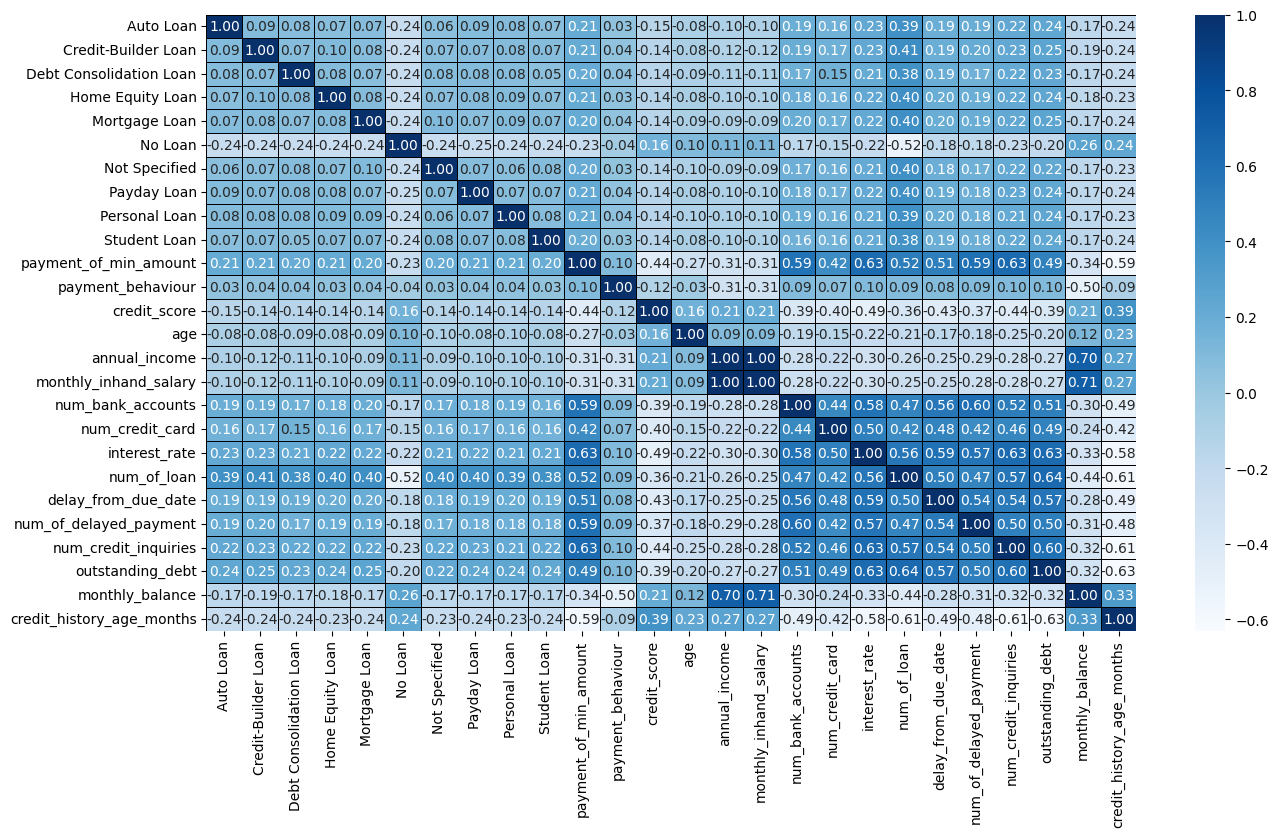

In [178]:
# mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 8))
sns.heatmap(corr,#mask = mask,
 cmap="Blues", annot=True, fmt=".2f",
           cbar=True, linewidths=0.5, linecolor='black')

In [179]:
# "credit_history_age_months","monthly_balance",'num_credit_card','interest_rate', 'num_of_loan', 'delay_from_due_date',
#        'num_of_delayed_payment', 'num_credit_inquiries', 'outstanding_debt','num_bank_accounts','payment_of_min_amount'

In [180]:
df_full.columns

Index(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'No Loan', 'Not Specified',
       'Payday Loan', 'Personal Loan', 'Student Loan', 'payment_of_min_amount',
       'payment_behaviour', 'credit_score', 'age', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'num_credit_inquiries', 'outstanding_debt',
       'monthly_balance', 'credit_history_age_months'],
      dtype='object')

In [181]:
df_full.head()

Auto Loan  Credit-Builder Loan  Debt Consolidation Loan  Home Equity Loan  \
0          1                    1                        0                 1   
1          1                    1                        0                 1   
2          1                    1                        0                 1   
3          1                    1                        0                 1   
4          1                    1                        0                 1   

   Mortgage Loan  No Loan  Not Specified  Payday Loan  Personal Loan  \
0              0        0              0            0              1   
1              0        0              0            0              1   
2              0        0              0            0              1   
3              0        0              0            0              1   
4              0        0              0            0              1   

   Student Loan  ...  num_bank_accounts  num_credit_card  interest_rate  \
0             0  ...                3.0              4.0            3.0   
1             0  ...                3.0              4.0            3.0   
2             0  ...                3.0              4.0            3.0   
3             0  ...                3.0              4.0            3.0   
4             0  ...                3.0              4.0            3.0   

   num_of_loan  delay_from_due_date  num_of_delayed_payment  \
0          4.0                    3                     7.0   
1          4.0                    1                     7.0   
2          4.0                    3                     7.0   
3          4.0                    5                     4.0   
4          4.0                    6                     4.0   

   num_credit_inquiries  outstanding_debt  monthly_balance  \
0                   4.0         809.97998       312.494089   
1                   4.0         809.97998       284.629162   
2                   4.0         809.97998       331.209863   
3                   4.0         809.97998       223.451310   
4                   4.0         809.97998       341.489231   

   credit_history_age_months  
0                        265  
1                        266  
2                        267  
3                        268  
4                        269  

[5 rows x 26 columns]

ch·ªçn ƒë·∫∑c tr∆∞ng

In [182]:
from sklearn.model_selection import train_test_split

features = [ "credit_history_age_months","monthly_balance",'num_credit_card','interest_rate', 'num_of_loan', 'delay_from_due_date',
        'num_of_delayed_payment', 'num_credit_inquiries', 'outstanding_debt','annual_income','num_bank_accounts','payment_of_min_amount']
# C√°c thu·ªôc t√≠nh ƒë·∫ßu v√†o v√† nh√£n
X = df_full[features]
y = df_full['credit_score']

# Chia t·∫≠p train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [183]:
# chu·∫©n ho√° d·ªØ li·ªáu ƒë·∫ßu v√†o
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Regression Softmax

In [184]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

In [185]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[4058  834  982]
 [2475 4925 3199]
 [ 104  503 2920]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      5874
           1       0.79      0.46      0.58     10599
           2       0.41      0.83      0.55      3527

    accuracy                           0.60     20000
   macro avg       0.60      0.66      0.59     20000
weighted avg       0.67      0.60      0.60     20000



In [186]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.5991
Test Accuracy: 0.5951


# Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [188]:
# T·∫°o m√¥ h√¨nh
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [189]:
# Scale d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# D·ª± ƒëo√°n
y_pred = model.predict(X_test_scaled)

# ƒê√°nh gi√°
print("ƒê·ªô ch√≠nh x√°c:", accuracy_score(y_test, y_pred))
print("Ma tr·∫≠n nh·∫ßm l·∫´n:\n", confusion_matrix(y_test, y_pred))
print("B√°o c√°o ph√¢n lo·∫°i:\n", classification_report(y_test, y_pred))


ƒê·ªô ch√≠nh x√°c: 0.62495
Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[2969 2702  203]
 [1695 7902 1002]
 [  62 1837 1628]]
B√°o c√°o ph√¢n lo·∫°i:
               precision    recall  f1-score   support

           0       0.63      0.51      0.56      5874
           1       0.64      0.75      0.69     10599
           2       0.57      0.46      0.51      3527

    accuracy                           0.62     20000
   macro avg       0.61      0.57      0.59     20000
weighted avg       0.62      0.62      0.62     20000



In [190]:

# ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

# In k·∫øt qu·∫£
print(f"Train Accuracy (Logistic Regression): {train_accuracy:.4f}")
print(f"Test Accuracy (Logistic Regression): {test_accuracy:.4f}")


Train Accuracy (Logistic Regression): 0.6267
Test Accuracy (Logistic Regression): 0.6250


# RandomForest

In [191]:
from sklearn.ensemble import RandomForestClassifier

# T·∫°o m√¥ h√¨nh
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [192]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# D·ª± ƒëo√°n
y_pred = model.predict(X_test_scaled)

# ƒê√°nh gi√°
print("ƒê·ªô ch√≠nh x√°c:", accuracy_score(y_test, y_pred))
print("Ma tr·∫≠n nh·∫ßm l·∫´n:\n", confusion_matrix(y_test, y_pred))
print("B√°o c√°o ph√¢n lo·∫°i:\n", classification_report(y_test, y_pred))


ƒê·ªô ch√≠nh x√°c: 0.8129
Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[4915  939   20]
 [1183 8673  743]
 [  16  841 2670]]
B√°o c√°o ph√¢n lo·∫°i:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      5874
           1       0.83      0.82      0.82     10599
           2       0.78      0.76      0.77      3527

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



In [193]:
from sklearn.model_selection import cross_val_score

# ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng K-fold Cross Validation (v√≠ d·ª• K=5)
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f"ƒê·ªô ch√≠nh x√°c trung b√¨nh (Cross-Validation): {scores.mean():.4f}")


ƒê·ªô ch√≠nh x√°c trung b√¨nh (Cross-Validation): 0.8009


Th√™m c√°i c√¢n b·∫±ng l·ªõp

In [194]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [195]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# D·ª± ƒëo√°n
y_pred = model.predict(X_test_scaled)

# ƒê√°nh gi√°
print("ƒê·ªô ch√≠nh x√°c:", accuracy_score(y_test, y_pred))
print("Ma tr·∫≠n nh·∫ßm l·∫´n:\n", confusion_matrix(y_test, y_pred))
print("B√°o c√°o ph√¢n lo·∫°i:\n", classification_report(y_test, y_pred))


ƒê·ªô ch√≠nh x√°c: 0.5139
Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[   0 5763  111]
 [   0 9979  620]
 [   0 3228  299]]
B√°o c√°o ph√¢n lo·∫°i:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5874
           1       0.53      0.94      0.67     10599
           2       0.29      0.08      0.13      3527

    accuracy                           0.51     20000
   macro avg       0.27      0.34      0.27     20000
weighted avg       0.33      0.51      0.38     20000



c·∫£i ti·∫øn th√™m x√≠u, m√† nh∆∞ c√°i t·∫£ qu√® n√®

In [196]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}

clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [197]:
# D·ª± ƒëo√°n
y_pred = grid.predict(X_test_scaled)

# ƒê√°nh gi√°
print("ƒê·ªô ch√≠nh x√°c:", accuracy_score(y_test, y_pred))
print("Ma tr·∫≠n nh·∫ßm l·∫´n:\n", confusion_matrix(y_test, y_pred))
print("B√°o c√°o ph√¢n lo·∫°i:\n", classification_report(y_test, y_pred))

ƒê·ªô ch√≠nh x√°c: 0.4887
Ma tr·∫≠n nh·∫ßm l·∫´n:
 [[   0 4791 1083]
 [   0 6697 3902]
 [   0  450 3077]]
B√°o c√°o ph√¢n lo·∫°i:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5874
           1       0.56      0.63      0.59     10599
           2       0.38      0.87      0.53      3527

    accuracy                           0.49     20000
   macro avg       0.31      0.50      0.38     20000
weighted avg       0.36      0.49      0.41     20000



# DecisionTree

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [199]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Gi·ªõi h·∫°n ƒë·ªô s√¢u ƒë·ªÉ tr√°nh overfitting

# ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng K-fold Cross Validation (v√≠ d·ª• K=5)
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f"ƒê·ªô ch√≠nh x√°c trung b√¨nh (Cross-Validation): {scores.mean():.4f}")


ƒê·ªô ch√≠nh x√°c trung b√¨nh (Cross-Validation): 0.6610


In [200]:
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [201]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Accuracy tr√™n t·∫≠p hu·∫•n luy·ªán:", accuracy_score(y_train, y_train_pred))
print("Accuracy tr√™n t·∫≠p ki·ªÉm tra:", accuracy_score(y_test, y_test_pred))

print("B√°o c√°o ph√¢n lo·∫°i tr√™n t·∫≠p test:")
print(classification_report(y_test, y_test_pred))


Accuracy tr√™n t·∫≠p hu·∫•n luy·ªán: 0.6633
Accuracy tr√™n t·∫≠p ki·ªÉm tra: 0.6586
B√°o c√°o ph√¢n lo·∫°i tr√™n t·∫≠p test:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      5874
           1       0.64      0.83      0.72     10599
           2       0.77      0.18      0.29      3527

    accuracy                           0.66     20000
   macro avg       0.70      0.55      0.56     20000
weighted avg       0.68      0.66      0.63     20000



## Khi d√πng t·∫•t c·∫£ c·ªôt

In [202]:
# C√°c thu·ªôc t√≠nh ƒë·∫ßu v√†o v√† nh√£n
X1 = df_full.drop('credit_score', axis = 1)
y = df_full['credit_score']

# Chia t·∫≠p train/test
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# chu·∫©n ho√° d·ªØ li·ªáu ƒë·∫ßu v√†o
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [203]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Gi·ªõi h·∫°n ƒë·ªô s√¢u ƒë·ªÉ tr√°nh overfitting

# ƒê√°nh gi√° m√¥ h√¨nh b·∫±ng K-fold Cross Validation (v√≠ d·ª• K=5)
scores = cross_val_score(model, X1_train_scaled, y_train, cv=5)

print(f"ƒê·ªô ch√≠nh x√°c trung b√¨nh (Cross-Validation): {scores.mean():.4f}")

model.fit(X1_train_scaled, y_train)

y_train_pred = model.predict(X1_train_scaled)
y_test_pred = model.predict(X1_test_scaled)

print("Accuracy tr√™n t·∫≠p hu·∫•n luy·ªán:", accuracy_score(y_train, y_train_pred))
print("Accuracy tr√™n t·∫≠p ki·ªÉm tra:", accuracy_score(y_test, y_test_pred))

print("B√°o c√°o ph√¢n lo·∫°i tr√™n t·∫≠p test:")
print(classification_report(y_test, y_test_pred))

ƒê·ªô ch√≠nh x√°c trung b√¨nh (Cross-Validation): 0.6593
Accuracy tr√™n t·∫≠p hu·∫•n luy·ªán: 0.6618625
Accuracy tr√™n t·∫≠p ki·ªÉm tra: 0.656
B√°o c√°o ph√¢n lo·∫°i tr√™n t·∫≠p test:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      5874
           1       0.64      0.83      0.72     10599
           2       0.77      0.18      0.29      3527

    accuracy                           0.66     20000
   macro avg       0.70      0.55      0.56     20000
weighted avg       0.67      0.66      0.63     20000



# ANN 
X_train, X_test, y_train, y_test

In [ ]:

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# # Chu·∫©n h√≥a d·ªØ li·ªáu ƒë·∫ßu v√†o
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Encode nh√£n n·∫øu l√† ph√¢n lo·∫°i nhi·ªÅu l·ªõp
import numpy as np
num_classes = len(np.unique(y_train))

# N·∫øu nh√£n l√† s·ªë nguy√™n (0,1,2...) => d√πng one-hot encoding
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

ANN kh√¥ng c√≥ c√¢n b·∫±ng l·ªõp

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # ch·ªëng overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # d√πng softmax n·∫øu ph√¢n lo·∫°i nhi·ªÅu l·ªõp
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # d√πng cho ph√¢n lo·∫°i nhi·ªÅu l·ªõp
              metrics=['accuracy'])

# Early stopping ƒë·ªÉ d·ª´ng s·ªõm n·∫øu kh√¥ng c·∫£i thi·ªán
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_cat,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.7753 - accuracy: 0.6379 - val_loss: 0.7243 - val_accuracy: 0.6640
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7417 - accuracy: 0.6588 - val_loss: 0.7164 - val_accuracy: 0.6699
Epoch 3/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7333 - accuracy: 0.6638 - val_loss: 0.7117 - val_accuracy: 0.6690
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7262 - accuracy: 0.6656 - val_loss: 0.7075 - val_accuracy: 0.6737
Epoch 5/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7214 - accuracy: 0.6680 - val_loss: 0.7053 - val_accuracy: 0.6731
Epoch 6/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7197 - accuracy: 0.6683 - val_loss: 0.7043 - val_accuracy: 0.6724
Epoch 7/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7169 - accuracy: 0.6701 - val_loss: 0.7025 - val_ac

In [ ]:
# ƒê√°nh gi√° tr√™n t·∫≠p test
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.6789


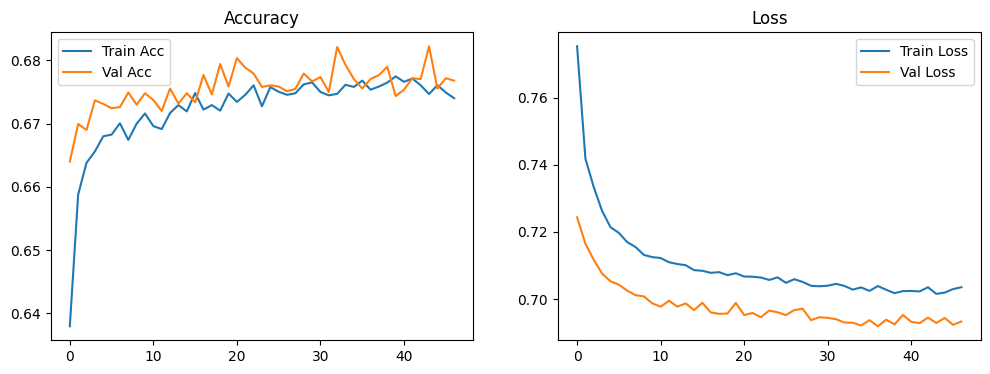

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred))


625/625 [==============================] - 1s 928us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65      5874
           1       0.70      0.75      0.73     10599
           2       0.56      0.59      0.57      3527

    accuracy                           0.68     20000
   macro avg       0.66      0.65      0.65     20000
weighted avg       0.68      0.68      0.68     20000



ANN c√≥ c√¢n b·∫±ng l·ªõp

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# T√≠nh tr·ªçng s·ªë cho t·ª´ng l·ªõp
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

# Chuy·ªÉn sang d·∫°ng dict {0: ..., 1: ..., 2: ...}
class_weights_dict = dict(enumerate(class_weights))

# Hu·∫•n luy·ªán v·ªõi tr·ªçng s·ªë l·ªõp
model.fit(X_train_scaled, y_train_cat,
          epochs=100,
          batch_size=32,
          validation_split=0.2,
          callbacks=[early_stop],
          class_weight=class_weights_dict,  # üí° Th√™m d√≤ng n√†y
          verbose=1)


Epoch 1/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7252 - accuracy: 0.6477 - val_loss: 0.7620 - val_accuracy: 0.6513
Epoch 2/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7223 - accuracy: 0.6451 - val_loss: 0.7627 - val_accuracy: 0.6506
Epoch 3/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7216 - accuracy: 0.6427 - val_loss: 0.7583 - val_accuracy: 0.6500
Epoch 4/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7204 - accuracy: 0.6419 - val_loss: 0.7570 - val_accuracy: 0.6514
Epoch 5/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7216 - accuracy: 0.6436 - val_loss: 0.7639 - val_accuracy: 0.6446
Epoch 6/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7221 - accuracy: 0.6425 - val_loss: 0.7675 - val_accuracy: 0.6468
Epoch 7/100
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7209 - accuracy: 0.6432 - val_loss: 0.7711 - val_ac

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

625/625 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      5874
           1       0.84      0.50      0.63     10599
           2       0.46      0.82      0.59      3527

    accuracy                           0.64     20000
   macro avg       0.64      0.71      0.64     20000
weighted avg       0.71      0.64      0.64     20000



ANN c√¢n b·∫±ng l·ªõp, train tr√™n t·∫•t c·∫£ c√°c c·ªôt

In [ ]:
from sklearn.utils import class_weight
import numpy as np

model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X1_train.shape[1],)),
    Dropout(0.3),  # ch·ªëng overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # d√πng softmax n·∫øu ph√¢n lo·∫°i nhi·ªÅu l·ªõp
])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',  # d√πng cho ph√¢n lo·∫°i nhi·ªÅu l·ªõp
              metrics=['accuracy'])

# Early stopping ƒë·ªÉ d·ª´ng s·ªõm n·∫øu kh√¥ng c·∫£i thi·ªán
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# T√≠nh tr·ªçng s·ªë cho t·ª´ng l·ªõp
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

# Chuy·ªÉn sang d·∫°ng dict {0: ..., 1: ..., 2: ...}
class_weights_dict = dict(enumerate(class_weights))

# Hu·∫•n luy·ªán v·ªõi tr·ªçng s·ªë l·ªõp
model1.fit(X1_train_scaled, y_train_cat,
          epochs=100,
          batch_size=32,
          validation_split=0.2,
          callbacks=[early_stop],
          class_weight=class_weights_dict,  # üí° Th√™m d√≤ng n√†y
          verbose=1)

Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.8222 - accuracy: 0.5818 - val_loss: 0.8226 - val_accuracy: 0.6177
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7750 - accuracy: 0.6165 - val_loss: 0.7946 - val_accuracy: 0.6291
Epoch 3/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7573 - accuracy: 0.6282 - val_loss: 0.7844 - val_accuracy: 0.6373
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7491 - accuracy: 0.6326 - val_loss: 0.7795 - val_accuracy: 0.6370
Epoch 5/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7434 - accuracy: 0.6355 - val_loss: 0.7817 - val_accuracy: 0.6370
Epoch 6/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7391 - accuracy: 0.6347 - val_loss: 0.7554 - val_accuracy: 0.6463
Epoch 7/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7359 - accuracy: 0.6355 - val_loss: 0.7650 - val_ac

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# D·ª± ƒëo√°n x√°c su·∫•t ‚Üí l·∫•y nh√£n d·ª± ƒëo√°n
y_pred_prob = model.predict(X1_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# N·∫øu y_test l√† one-hot ‚Üí chuy·ªÉn v·ªÅ nh√£n th·∫≠t
y_true = np.argmax(y_test_cat, axis=1)


625/625 [==============================] - 1s 1ms/step


In [ ]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1198  237 4439]
 [4360  469 5770]
 [1917  175 1435]]


In [ ]:
y_pred_probs = model1.predict(X1_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

625/625 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      5874
           1       0.83      0.52      0.64     10599
           2       0.48      0.79      0.60      3527

    accuracy                           0.65     20000
   macro avg       0.64      0.70      0.65     20000
weighted avg       0.71      0.65      0.65     20000



In [ ]:
import numpy as np
import pandas as pd

# N·∫øu y_true l√† m·∫£ng numpy (ƒë√£ one-hot inverse r·ªìi)
unique, counts = np.unique(y_true, return_counts=True)
label_distribution = pd.DataFrame({'Label': unique, 'Count': counts})
label_distribution['Percentage'] = 100 * label_distribution['Count'] / label_distribution['Count'].sum()

print(label_distribution)


   Label  Count  Percentage
0      0   5874      29.370
1      1  10599      52.995
2      2   3527      17.635


# C·∫£i ti·∫øn ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X1_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(3, activation='softmax')  # s·ªë l·ªõp = s·ªë l·ªõp ph√¢n lo·∫°i
])

optimizer = Adam(learning_rate=0.0005)

model2.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model2.fit(X1_train_scaled, y_train_cat,
           epochs=100,
           batch_size=64,  # tƒÉng batch_size c√≥ th·ªÉ gi√∫p t·ªëi ∆∞u h√≥a nhanh h∆°n
           validation_split=0.2,
           callbacks=[early_stop],
           class_weight=class_weights_dict,
           verbose=1)



Epoch 1/100
1000/1000 [==============================] - 5s 4ms/step - loss: 0.9155 - accuracy: 0.5653 - val_loss: 0.8135 - val_accuracy: 0.6254
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7923 - accuracy: 0.6124 - val_loss: 0.7947 - val_accuracy: 0.6344
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7670 - accuracy: 0.6243 - val_loss: 0.7963 - val_accuracy: 0.6356
Epoch 4/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7548 - accuracy: 0.6294 - val_loss: 0.7810 - val_accuracy: 0.6409
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7467 - accuracy: 0.6331 - val_loss: 0.7832 - val_accuracy: 0.6407
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7396 - accuracy: 0.6339 - val_loss: 0.7643 - val_accuracy: 0.6467
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7345 - accuracy: 0.6363 - val_loss: 0.7655 - val_ac

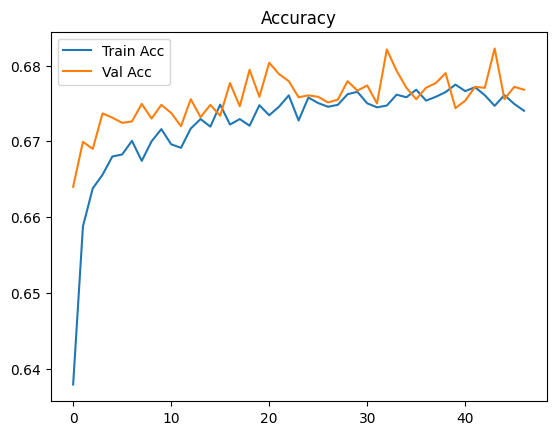

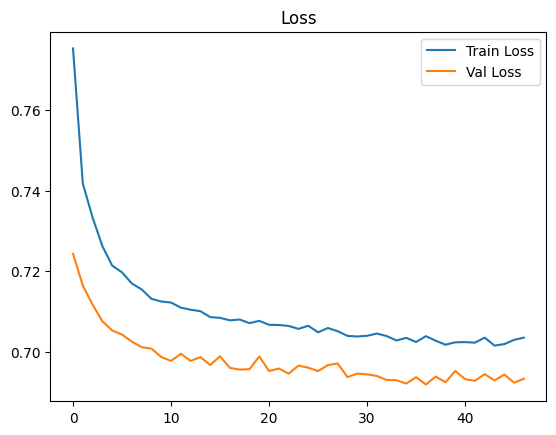

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()
